<a href="https://colab.research.google.com/github/profandersonvanin01/analisa_ai/blob/main/AnalisaAi_SUICIDIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np

In [195]:
bd = pd.read_csv('https://github.com/ProfAndersonVanin/analisa_ai/raw/refs/heads/main/datasus_suicidio.csv', encoding='latin1')
bd

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [196]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      58634 non-null  object 
 1   ano         58634 non-null  int64  
 2   CIRCOBITO   56606 non-null  object 
 3   DTOBITO     58634 non-null  object 
 4   DTNASC      58407 non-null  object 
 5   SEXO        58619 non-null  object 
 6   RACACOR     57298 non-null  object 
 7   ESTCIV      54305 non-null  object 
 8   ESC         45162 non-null  object 
 9   OCUP        58634 non-null  object 
 10  CODMUNRES   58634 non-null  object 
 11  LOCOCOR     58463 non-null  object 
 12  ASSISTMED   40872 non-null  object 
 13  CAUSABAS    58634 non-null  object 
 14  CAUSABAS_O  58544 non-null  object 
 15  idade       58407 non-null  float64
 16  mes         58634 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.6+ MB


Colunas que precisam de **atenção**



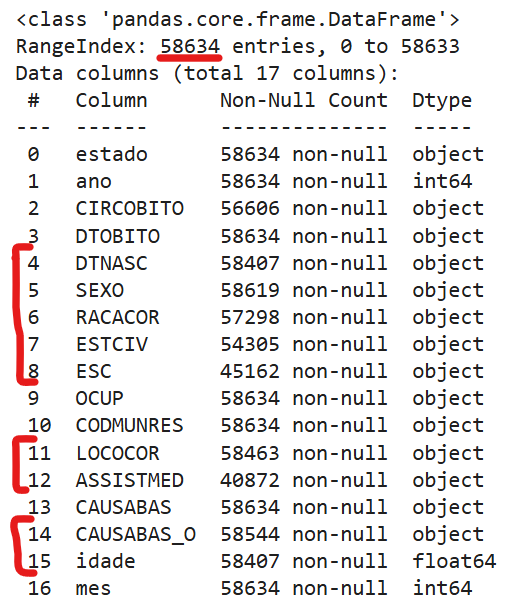

In [197]:
bd.isnull().sum()

estado            0
ano               0
CIRCOBITO      2028
DTOBITO           0
DTNASC          227
SEXO             15
RACACOR        1336
ESTCIV         4329
ESC           13472
OCUP              0
CODMUNRES         0
LOCOCOR         171
ASSISTMED     17762
CAUSABAS          0
CAUSABAS_O       90
idade           227
mes               0
dtype: int64

**TOTAL DE REGISTROS ==> 58634**

- QUANTIDADE DE DADOS NULOS

- CIRCOBTIDO ==> 56606 (3,46%) = 2028
- DTNASC ==> 58407 (0,38%) = 227
- SEXO ==> 58619 (0,026%) = 15
- RACACOR ==> 57298 (2,28%) = 1336
- ESTCIV ==> 54305 (**7,38%**) = 4329
- ESC ==> 45162 (**22,98%**) = 13472
- LOCOCOR ==> 58463 (0,29%) = 171
- ASSISTMED ==> 40872 (**30,29%**) = 17762
- CAUSABAS_O ==> 58544 (0,15%) = 90
- idade ==> 58407 (0,39%) = 227

Colunas que requerem maior atenção são: **ESTCIV**, **ESC** e **ASSISTMED**

As demais colunas como possuem uma porcentagem menor que 5% do total de dados, nestas os registros serão excluídos.

> **Obs.: Isso não é uma regra, foi uma opção minha com base na quantidade de valores nulos!**

In [198]:
# Remover registros com valores nulos apenas nas colunas 'Nome' e 'Idade'
bd2 = bd.dropna(subset=['CIRCOBITO', 'DTNASC', 'SEXO', 'RACACOR', 'LOCOCOR','CAUSABAS_O','idade'])
bd2

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [199]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      54970 non-null  object 
 1   ano         54970 non-null  int64  
 2   CIRCOBITO   54970 non-null  object 
 3   DTOBITO     54970 non-null  object 
 4   DTNASC      54970 non-null  object 
 5   SEXO        54970 non-null  object 
 6   RACACOR     54970 non-null  object 
 7   ESTCIV      51448 non-null  object 
 8   ESC         42726 non-null  object 
 9   OCUP        54970 non-null  object 
 10  CODMUNRES   54970 non-null  object 
 11  LOCOCOR     54970 non-null  object 
 12  ASSISTMED   38937 non-null  object 
 13  CAUSABAS    54970 non-null  object 
 14  CAUSABAS_O  54970 non-null  object 
 15  idade       54970 non-null  float64
 16  mes         54970 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.5+ MB


In [200]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV         3522
ESC           12244
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ESTCIV**

Temos a seguinte informação a respeito desta coluna:

- **ESTCIV**: 1: Solteiro, 2: Casado, 3: Viúvo, 4: Separado judicialmente, 5: União consensual, 0;6;7;8;9: NA.

Vamos analisar a ocorrência individual de valores nesta coluna:

In [201]:
bd2['ESTCIV'].unique()

array(['Casado', 'União consensual', nan, 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [202]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ESTCIV'] = bd2['ESTCIV'].fillna('Não Informado')

In [203]:
bd2['ESTCIV'].unique()

array(['Casado', 'União consensual', 'Não Informado', 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [204]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV            0
ESC           12244
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ESC**

Temos a seguinte informação a respeito desta coluna:

- **ESC**: 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos, 0;6;7;9;A : NA .

Vamos analisar a ocorrência individual de valores nesta coluna:

In [205]:
bd2['ESC'].unique()

array(['4 a 7 anos', '12 e mais', nan, '8 a 11 anos', '1 a 3 anos',
       'Nenhuma'], dtype=object)

In [206]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ESC'] = bd2['ESC'].fillna('Não Informado')

In [207]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV            0
ESC               0
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ASSISTMED**

Temos a seguinte informação a respeito desta coluna:

Assistência médica

- **ASSISTMED**: 1: Sim, 2: Não, 9: NA.

Vamos analisar a ocorrência individual de valores nesta coluna:

In [208]:
bd2['ASSISTMED'].unique()

array(['Não', nan, 'Sim'], dtype=object)

In [209]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ASSISTMED'] = bd2['ASSISTMED'].fillna('Não Informado')

In [210]:
bd2.isnull().sum()

estado        0
ano           0
CIRCOBITO     0
DTOBITO       0
DTNASC        0
SEXO          0
RACACOR       0
ESTCIV        0
ESC           0
OCUP          0
CODMUNRES     0
LOCOCOR       0
ASSISTMED     0
CAUSABAS      0
CAUSABAS_O    0
idade         0
mes           0
dtype: int64

**NESTE PONTO NÃO TEMOS MAIS DADOS NULOS OU FALTANTES.**

A base inicial possuia `58634` registros e agora estamos com `54970`.

Na etapa de remoção de dados nulos removemos `6,25%` do total de registros.

In [211]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      54970 non-null  object 
 1   ano         54970 non-null  int64  
 2   CIRCOBITO   54970 non-null  object 
 3   DTOBITO     54970 non-null  object 
 4   DTNASC      54970 non-null  object 
 5   SEXO        54970 non-null  object 
 6   RACACOR     54970 non-null  object 
 7   ESTCIV      54970 non-null  object 
 8   ESC         54970 non-null  object 
 9   OCUP        54970 non-null  object 
 10  CODMUNRES   54970 non-null  object 
 11  LOCOCOR     54970 non-null  object 
 12  ASSISTMED   54970 non-null  object 
 13  CAUSABAS    54970 non-null  object 
 14  CAUSABAS_O  54970 non-null  object 
 15  idade       54970 non-null  float64
 16  mes         54970 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.5+ MB


In [212]:
bd2

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


Veja que temos as colunas: `DTOBITO`, `DTNASC` e `idade`. Há outra coluna chamado `ano`.

Vamos manter a coluna `ano` e `idade`. As outras duas não são necessárias.

Outro tipo de tratamento que pode ser feito é converter o valor da coluna `idade` para inteiro.

In [213]:
# Remover colunas 'Cidade' e 'Estado'
bd3 = bd2.drop(columns=['DTOBITO', 'DTNASC'])

In [214]:
bd3

,estado,ano,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [215]:
# Converter valores da coluna 'Idade' para inteiro
bd3['idade'] = bd3['idade'].astype(int)

In [216]:
bd3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estado      54970 non-null  object
 1   ano         54970 non-null  int64 
 2   CIRCOBITO   54970 non-null  object
 3   SEXO        54970 non-null  object
 4   RACACOR     54970 non-null  object
 5   ESTCIV      54970 non-null  object
 6   ESC         54970 non-null  object
 7   OCUP        54970 non-null  object
 8   CODMUNRES   54970 non-null  object
 9   LOCOCOR     54970 non-null  object
 10  ASSISTMED   54970 non-null  object
 11  CAUSABAS    54970 non-null  object
 12  CAUSABAS_O  54970 non-null  object
 13  idade       54970 non-null  int32 
 14  mes         54970 non-null  int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 6.5+ MB


Renomeando as colunas para ficarem no mesmo formato

In [217]:
# Renomear colunas
bd3 = bd3.rename(columns={'estado': 'ESTADO', 'ano': 'ANO','idade':'IDADE','mes':'MES'})
bd3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESTADO      54970 non-null  object
 1   ANO         54970 non-null  int64 
 2   CIRCOBITO   54970 non-null  object
 3   SEXO        54970 non-null  object
 4   RACACOR     54970 non-null  object
 5   ESTCIV      54970 non-null  object
 6   ESC         54970 non-null  object
 7   OCUP        54970 non-null  object
 8   CODMUNRES   54970 non-null  object
 9   LOCOCOR     54970 non-null  object
 10  ASSISTMED   54970 non-null  object
 11  CAUSABAS    54970 non-null  object
 12  CAUSABAS_O  54970 non-null  object
 13  IDADE       54970 non-null  int32 
 14  MES         54970 non-null  int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 6.5+ MB


In [218]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7


Vejam que na coluna OCUP aparecem alguns valores estranhos:

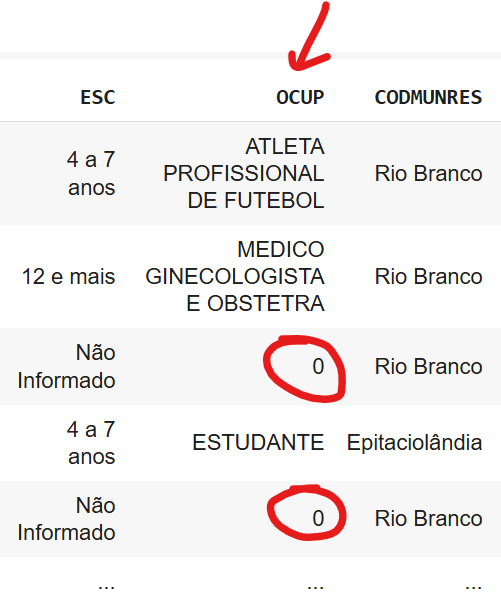

0 = sem profissao

- Tratar esses valores....

- Verificar valores unicos em todas as colunas e ver se encontram mais alguma assim...

...

In [219]:
bd3['OCUP'].unique()

array(['ATLETA PROFISSIONAL DE FUTEBOL',
       'MEDICO GINECOLOGISTA E OBSTETRA', '0', ..., 'CATADOR DE MARISCOS',
       'SUBTENENTE BOMBEIRO MILITAR',
       'GERENTE DE PESQUISA E DESENVOLVIMENTO (P&D)'], dtype=object)

Na coluna 'OCUP' temos o dado: 0, que se refere a pessoas desempregadas 

In [220]:
# Substituir os valores '0' da coluna 'OCUP' por 'DESEMPREGADO'
bd3.loc[bd3['OCUP'] == '0', 'OCUP'] = 'DESEMPREGADO'

In [221]:
bd3[bd3['OCUP'] == 'DESEMPREGADO']

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2
5,AC,2014,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,51,2
6,AC,2014,Suicídio,Masculino,Parda,Solteiro,1 a 3 anos,DESEMPREGADO,Senador Guiomard,Outros,Não,X700,X700,25,2
8,AC,2014,Suicídio,Masculino,Branca,Casado,12 e mais,DESEMPREGADO,Cruzeiro do Sul,Domicílio,Não,X702,X702,39,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58606,TO,2018,Suicídio,Masculino,Parda,Separado judicialmente,4 a 7 anos,DESEMPREGADO,Tocantinópolis,Domicílio,Não,X700,X700,31,9
58612,TO,2018,Suicídio,Masculino,Parda,Solteiro,1 a 3 anos,DESEMPREGADO,Araguatins,Domicílio,Não Informado,X700,X700,54,11
58615,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,DESEMPREGADO,Wanderlândia,Outros,Não Informado,X701,X701,26,12
58617,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,DESEMPREGADO,Nova Olinda,Via pública,Não,X824,X824,29,12


Na coluna 'LOCOCOR' temos o dado anormal "6" que por não ter muitas informações do que ele possa ser e ter poucos registros(6 linhas), irei colocar esses dados na categoria "Outros"

In [222]:
bd3['LOCOCOR'].unique()

array(['Domicílio', 'Outros', 'Hospital', 'Via pública',
       'Outro estabelecimento de saúde', '6'], dtype=object)

In [223]:
bd3[bd3['LOCOCOR'] == '6']

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
10920,AM,2015,Suicídio,Masculino,Indígena,União consensual,Não Informado,PRODUTOR AGRICOLA POLIVALENTE,Jutaí,6,Sim,X689,X689,24,6
22102,AM,2016,Suicídio,Feminino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Tabatinga,6,Não,X709,X709,13,1
22104,AM,2016,Suicídio,Feminino,Indígena,União consensual,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Benjamin Constant,6,Não,X709,X709,18,3
22106,AM,2016,Suicídio,Feminino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Benjamin Constant,6,Não,X709,X709,17,4
22287,AM,2016,Suicídio,Masculino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Tabatinga,6,Não,X709,X709,17,4
22289,AM,2016,Suicídio,Masculino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,São Paulo de Olivença,6,Não,X709,X709,29,7


In [224]:
# Substituir os valores '6' da coluna 'LOCOCOR' por 'Outros'
bd3.loc[bd3['LOCOCOR'] == '6', 'LOCOCOR'] = 'Outros'

Agora temos nossos dados limpo para a analise

In [225]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7


<Axes: xlabel='CIRCOBITO'>

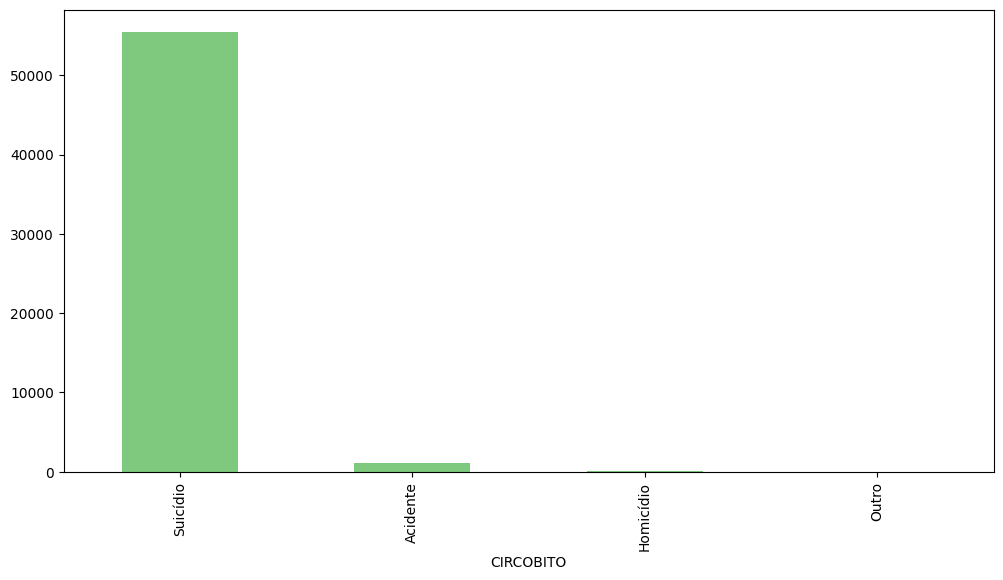

In [226]:
plt.figure(figsize=(12, 6))
bd['CIRCOBITO'].value_counts().plot.bar()

##### O Estado das pessoas impactam na saude mental da pessoa/ Qual é a distribuição de óbitos por estado ao longo dos anos?

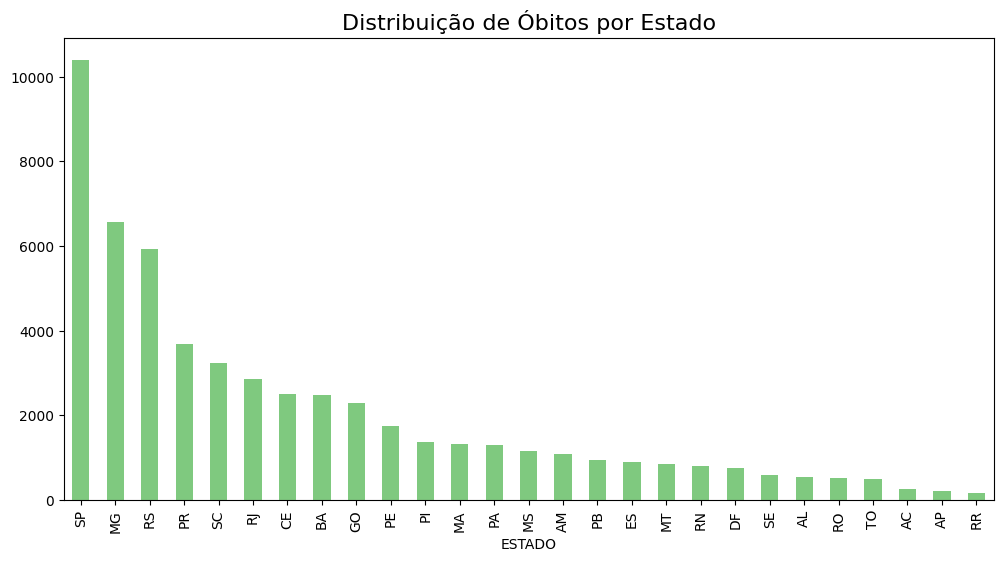

In [227]:
sns.set_palette('Accent')
plt.figure(figsize=(12, 6))

bd3['ESTADO'].value_counts().plot.bar()
plt.title('Distribuição de Óbitos por Estado', fontsize=16)

plt.show()

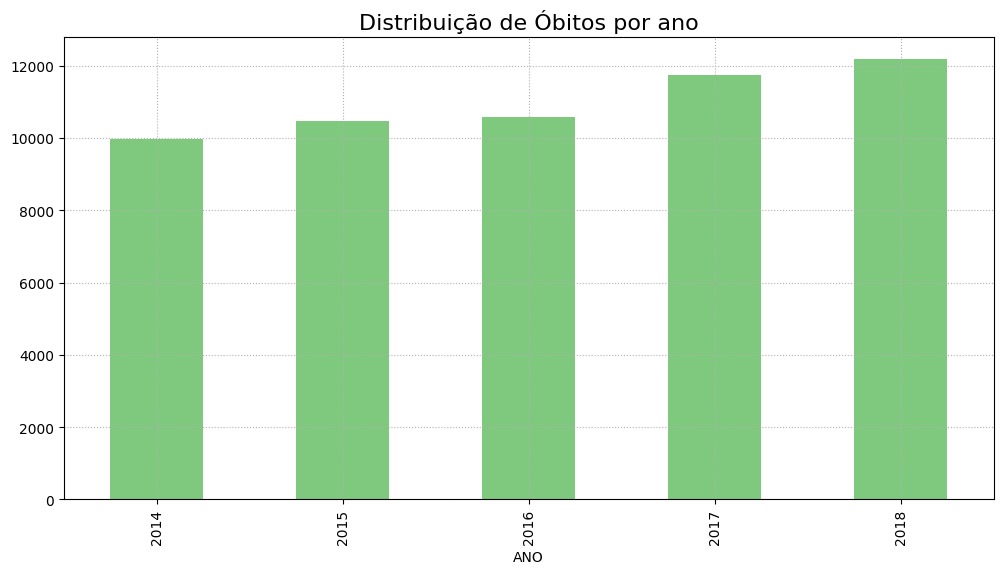

In [228]:
sns.set_palette('Accent')
plt.figure(figsize=(12, 6))
bd3['ANO'].value_counts().sort_index().plot.bar()

plt.title('Distribuição de Óbitos por ano', fontsize=16)
plt.grid(linestyle=':')

plt.show()

<Figure size 2000x1000 with 0 Axes>

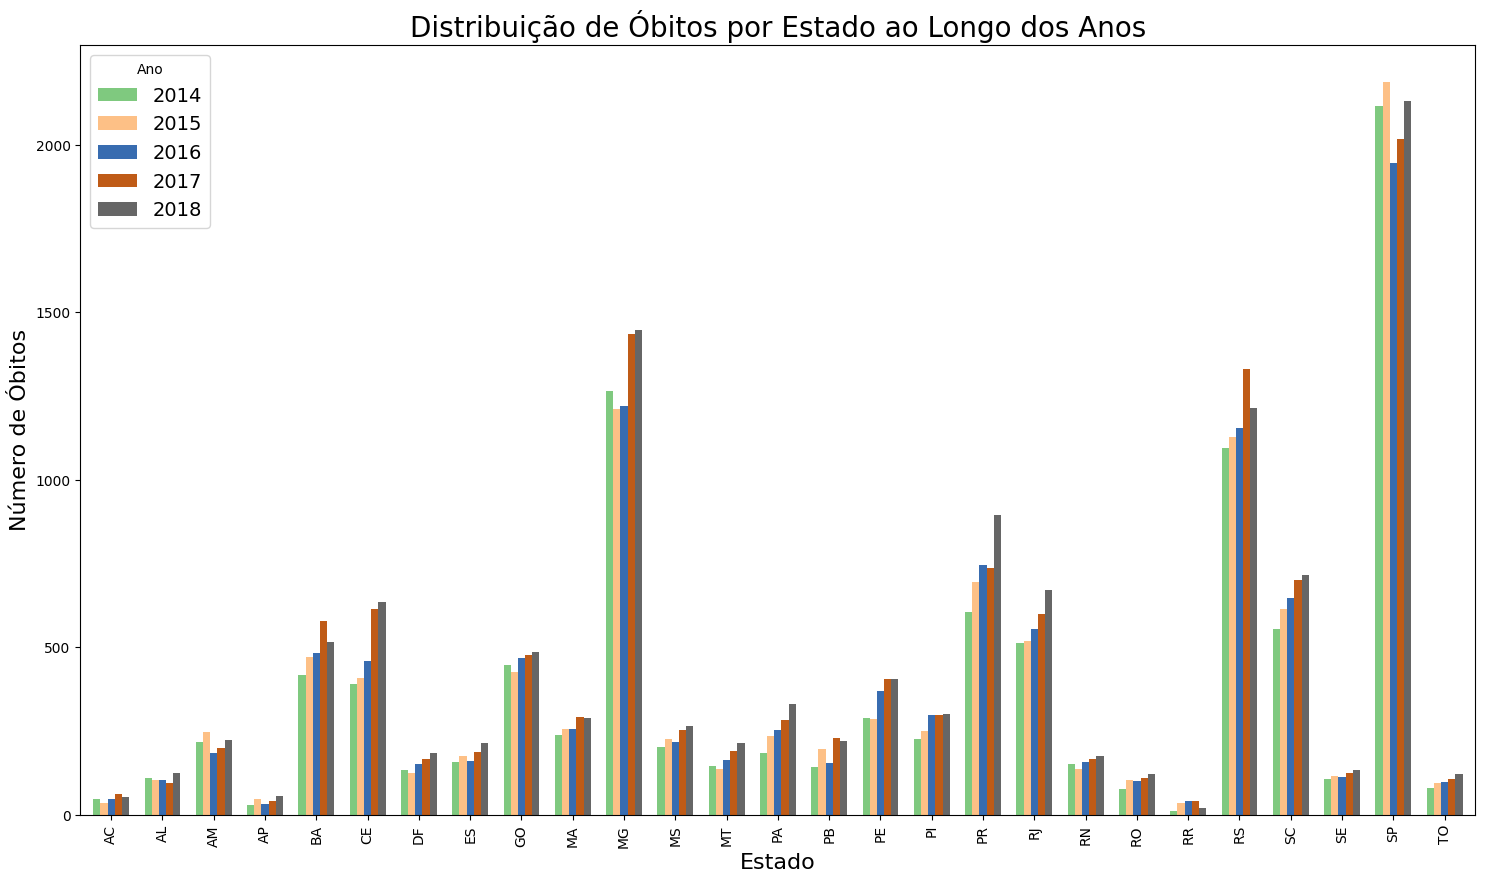

In [229]:
estado_ano = bd3.groupby(['ESTADO', 'ANO']).size().unstack()

plt.figure(figsize=(20, 10))
estado_ano.plot(kind='bar', figsize=(18, 10), cmap='Accent', width=0.7)

plt.title('Distribuição de Óbitos por Estado ao Longo dos Anos', fontsize=20)
plt.ylabel('Número de Óbitos', fontsize=16)
plt.xlabel('Estado', fontsize=16)
plt.legend(title='Ano', fontsize=14)

plt.show()

<Figure size 2000x1000 with 0 Axes>

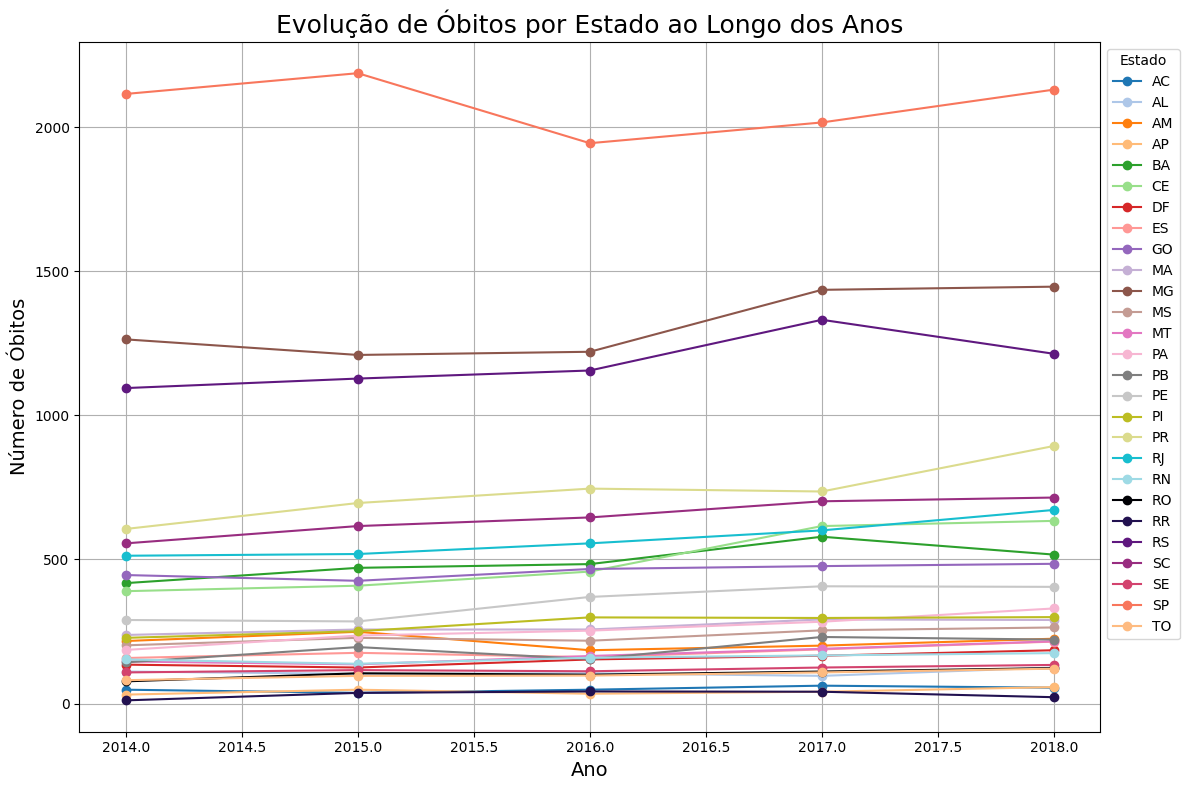

In [230]:
tab20_colors = plt.cm.tab20(np.linspace(0, 1, 20))  
accent_colors = plt.cm.magma(np.linspace(0, 1, 8)) 
combined_colors = np.vstack((tab20_colors, accent_colors))

plt.figure(figsize=(20, 10))
estado_ano.T.plot(kind='line', figsize=(12, 8), marker='o', color=combined_colors)

plt.title('Evolução de Óbitos por Estado ao Longo dos Anos', fontsize=18)
plt.ylabel('Número de Óbitos', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.legend(title='Estado', bbox_to_anchor=(1,1))
plt.grid(linestyle='-')
plt.tight_layout()
plt.show()

________________________________________________________________________________________________________________________________________________

### Tem diferenças no número de Óbitos por sexo?

Text(0.5, 1.0, 'Diferença por sexo')

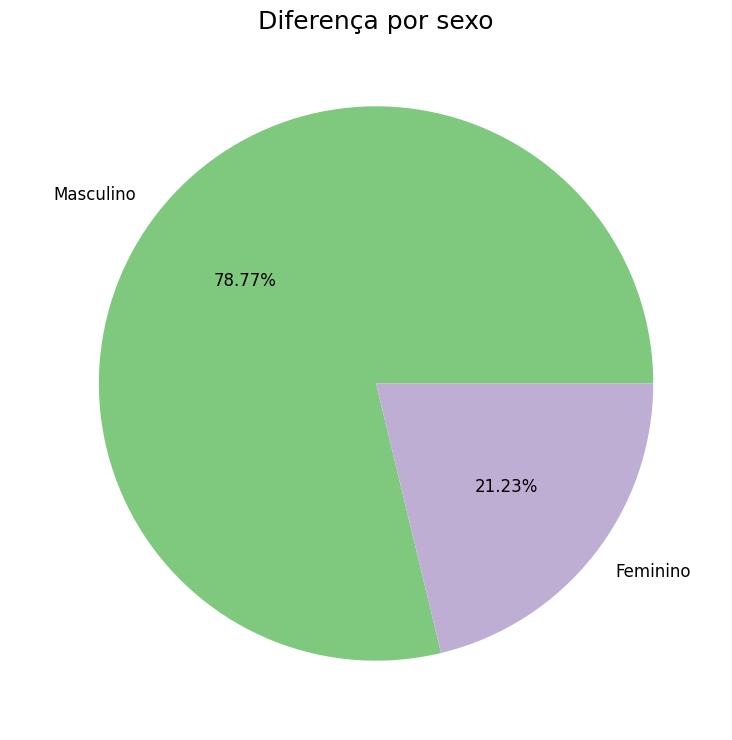

In [231]:
bd3['SEXO'].value_counts().plot.pie(autopct='%0.2f%%', fontsize=12, figsize=(9, 9))
plt.ylabel(' ')

plt.title('Diferença por sexo', fontsize=18)

<Figure size 1400x1400 with 0 Axes>

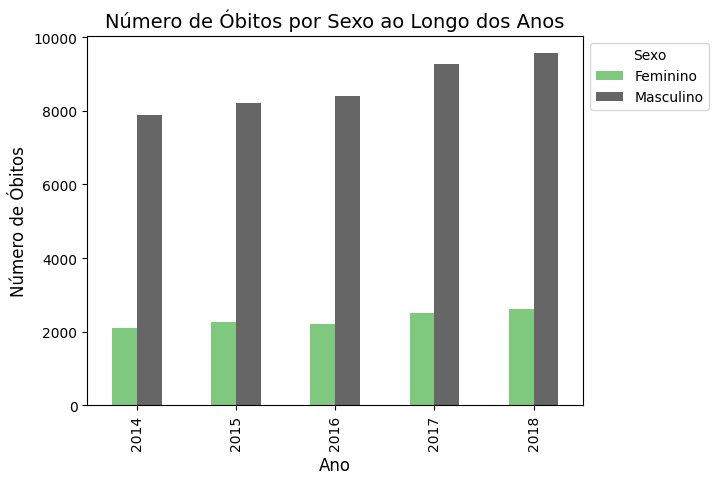

In [232]:
sexo_ano = bd3.groupby(['ANO', 'SEXO']).size().unstack()

plt.figure(figsize=(14, 14))
sexo_ano.plot(kind='bar', cmap='Accent')

plt.title('Número de Óbitos por Sexo ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)

plt.legend(title='Sexo', bbox_to_anchor=(1,1))
plt.show()

In [233]:
masculino = bd3[bd3['SEXO'] == 'Masculino'].shape[0]
feminino = bd3[bd3['SEXO'] == 'Feminino'].shape[0]

total_obitos = masculino + feminino

percentual_masculino = (masculino / total_obitos) * 100
percentual_feminino = (feminino / total_obitos) * 100

diferenca_percentual = percentual_masculino - percentual_feminino

print(f'O percentual Masculino e {diferenca_percentual:.2f}% maior que o feminino')

O percentual Masculino e 57.53% maior que o feminino


### Como a idade dos falecidos varia entre os estados ou ao longo dos anos?

In [234]:
bd3['IDADE'].describe()

count    54970.000000
mean        42.584883
std         17.362850
min          0.000000
25%         29.000000
50%         41.000000
75%         55.000000
max        113.000000
Name: IDADE, dtype: float64

In [235]:
def classificarIdade(idade):
    if idade <= 24:
        return 'Jovem'
    elif 24 < idade <= 59:
        return 'Adulto'
    else:
        return 'Idoso'
    
bd3['CATEGORIA_IDADE'] = bd3['IDADE'].apply(classificarIdade)

Text(0.5, 1.0, 'Diferença por sexo')

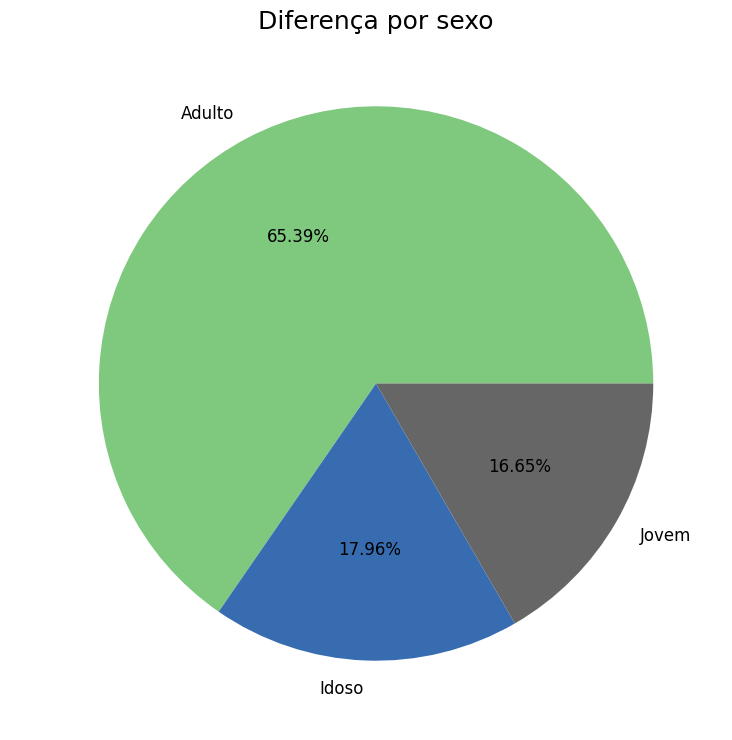

In [236]:
bd3['CATEGORIA_IDADE'].value_counts().plot.pie(autopct='%0.2f%%',fontsize=12,  figsize=(9, 9), cmap='Accent')

plt.ylabel(' ')

plt.title('Diferença por sexo', fontsize=18)

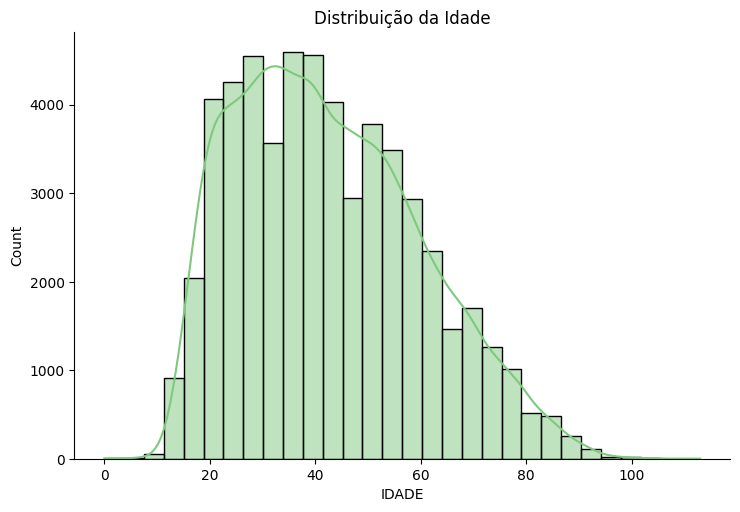

In [237]:
sns.set_palette('Accent')
sns.displot(bd3['IDADE'], kde=True, bins=30, aspect=1.5)

plt.title('Distribuição da Idade')
plt.show()

In [238]:
# nao consegui colocar de um modo mais legivel
idadeEstado = bd3.groupby('ESTADO')['IDADE']
print('Media por estado')
print(idadeEstado.mean())
print('Mediana por estado')
print(idadeEstado.median())
print('Minimo por estado')
print(idadeEstado.min())
print('Maximo por estado')
print(idadeEstado.max())

Media por estado
ESTADO
AC    32.828000
AL    38.822222
AM    31.731662
AP    31.824645
BA    43.043742
CE    42.349422
DF    39.048429
ES    43.279510
GO    41.574967
MA    39.360570
MG    43.166768
MS    36.882504
MT    40.577960
PA    35.871218
PB    43.682875
PE    42.870803
PI    41.939636
PR    43.056552
RJ    44.344635
RN    43.566919
RO    38.294574
RR    30.098039
RS    48.421097
SC    45.580216
SE    40.710924
SP    41.973646
TO    40.401590
Name: IDADE, dtype: float64
Mediana por estado
ESTADO
AC    30.0
AL    36.0
AM    28.0
AP    28.0
BA    41.0
CE    40.0
DF    37.0
ES    42.0
GO    39.0
MA    35.0
MG    42.0
MS    34.0
MT    38.0
PA    32.0
PB    42.0
PE    41.0
PI    38.0
PR    42.0
RJ    43.0
RN    42.0
RO    35.0
RR    25.0
RS    49.0
SC    46.0
SE    39.0
SP    40.0
TO    37.0
Name: IDADE, dtype: float64
Minimo por estado
ESTADO
AC    13
AL     0
AM     9
AP    12
BA    10
CE     7
DF    13
ES     4
GO     4
MA    11
MG     7
MS     8
MT    12
PA     4
PB    13
PE   

In [239]:
idadeANO = bd3.groupby('ANO')['IDADE']
print('Media por ANO')
print(idadeANO.mean())
print('Mediana por ANO')
print(idadeANO.median())
print('Minimo por ANO')
print(idadeANO.min())
print('Maximo por ANO')
print(idadeANO.max())

Media por ANO
ANO
2014    42.007725
2015    42.773994
2016    42.822774
2017    42.660628
2018    42.614475
Name: IDADE, dtype: float64
Mediana por ANO
ANO
2014    40.0
2015    41.0
2016    41.0
2017    41.0
2018    41.0
Name: IDADE, dtype: float64
Minimo por ANO
ANO
2014    3
2015    4
2016    0
2017    5
2018    2
Name: IDADE, dtype: int32
Maximo por ANO
ANO
2014    101
2015    113
2016    101
2017    112
2018    103
Name: IDADE, dtype: int32


In [240]:
FaixaEstado = bd3.groupby(['ESTADO', 'CATEGORIA_IDADE']).size().unstack()
print("Distribuição de faixa de idade por estado:")
print(FaixaEstado)

Distribuição de faixa de idade por estado:
CATEGORIA_IDADE  Adulto  Idoso  Jovem
ESTADO                               
AC                  148     16     86
AL                  338     73    129
AM                  598     66    413
AP                  113     14     84
BA                 1638    466    365
CE                 1634    437    436
DF                  509     90    165
ES                  670    136     92
GO                 1475    397    429
MA                  832    207    295
MG                 4642   1065    871
MS                  669    144    353
MT                  547    132    174
PA                  734    153    402
PB                  608    187    151
PE                 1116    336    305
PI                  860    268    247
PR                 2443    655    580
RJ                 1874    601    386
RN                  500    159    133
RO                  314     67    135
RR                   68     10     75
RS                 3560   1702    663
SC     

In [241]:
idadeANO = bd3.groupby(['ANO', 'CATEGORIA_IDADE']).size().unstack()
print("Distribuição de faixa de idade por ano:")
print(idadeANO)

Distribuição de faixa de idade por ano:
CATEGORIA_IDADE  Adulto  Idoso  Jovem
ANO                                  
2014               6699   1644   1624
2015               6886   1901   1695
2016               6960   1930   1701
2017               7622   2142   1993
2018               7778   2253   2142


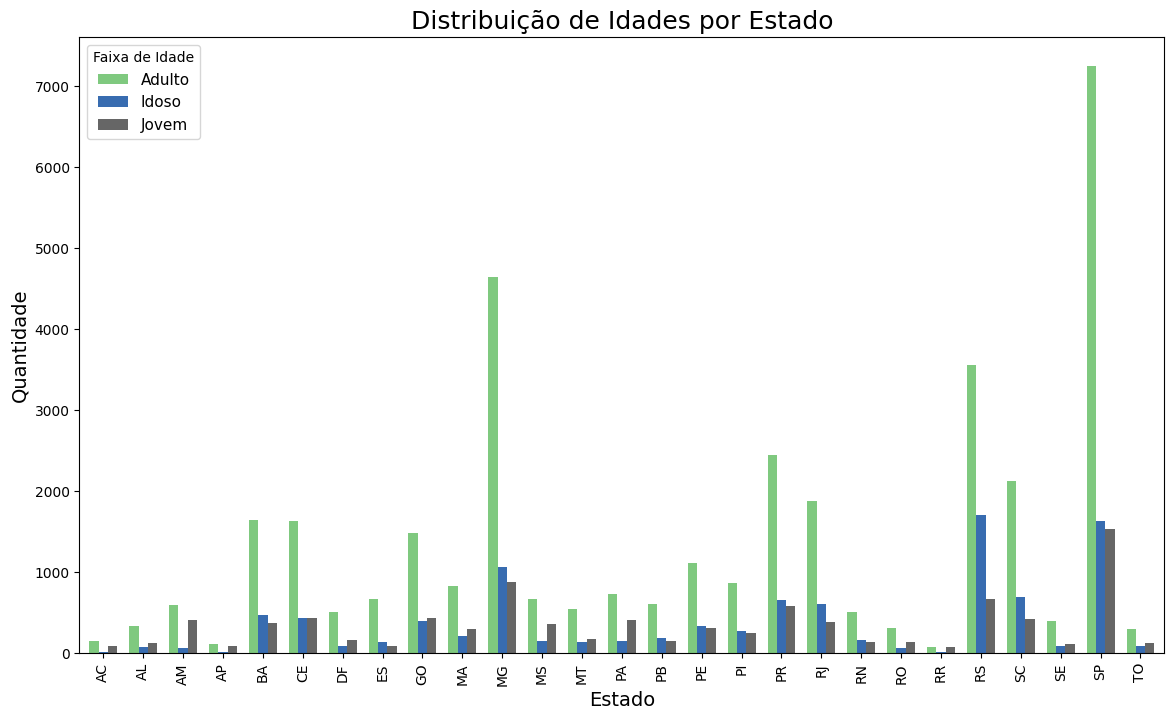

In [242]:
FaixaEstado.plot(kind='bar', figsize=(14, 8), cmap='Accent', width=0.7)
plt.title("Distribuição de Idades por Estado",fontsize=18)
plt.ylabel("Quantidade" , fontsize=14)
plt.xlabel("Estado", fontsize=14)
plt.legend(title='Faixa de Idade', fontsize=11)

plt.show()

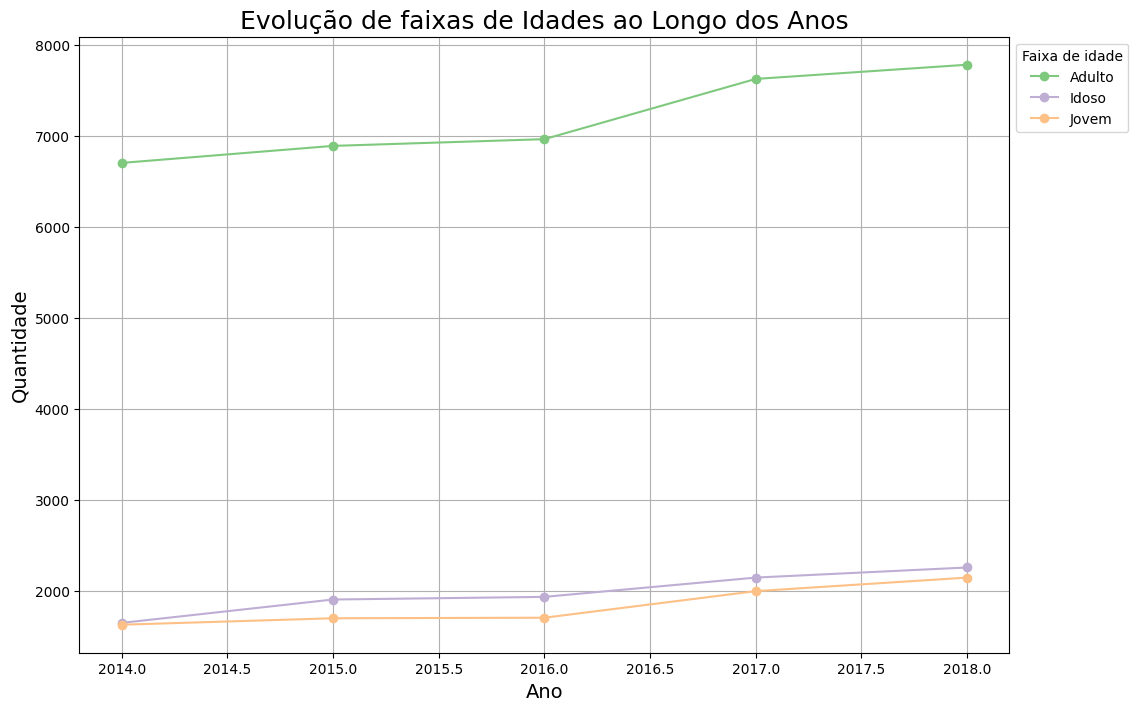

In [243]:
idadeANO.plot(kind='line', figsize=(12, 8), marker='o')
plt.title("Evolução de faixas de Idades ao Longo dos Anos", fontsize=18)
plt.ylabel("Quantidade", fontsize=14)
plt.xlabel("Ano", fontsize=14)
plt.legend(title='Faixa de idade', bbox_to_anchor=(1,1))

plt.grid(linestyle='-')
plt.show()

<Axes: >

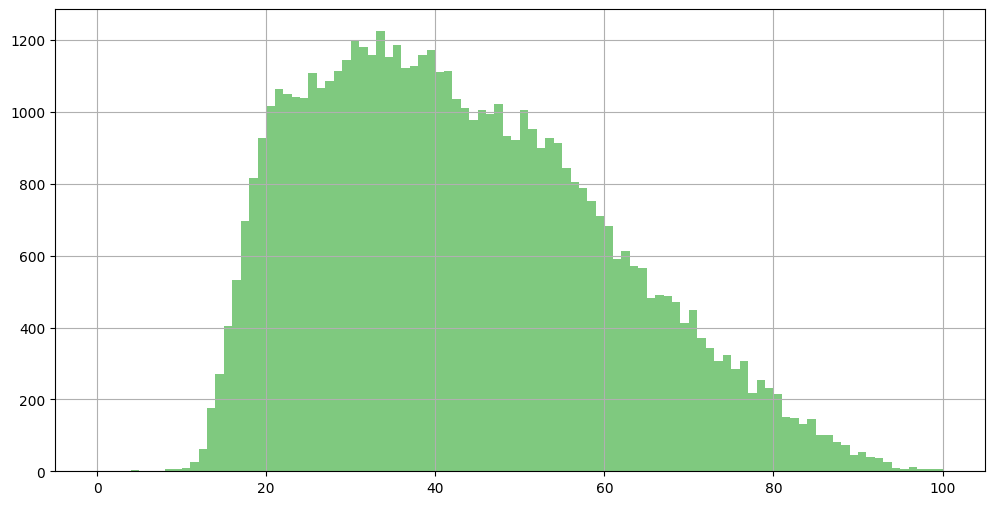

In [244]:
plt.figure(figsize=(12, 6))
bd3['IDADE'].hist(density=False, bins=100, range=[0,100])

<Axes: ylabel='IDADE'>

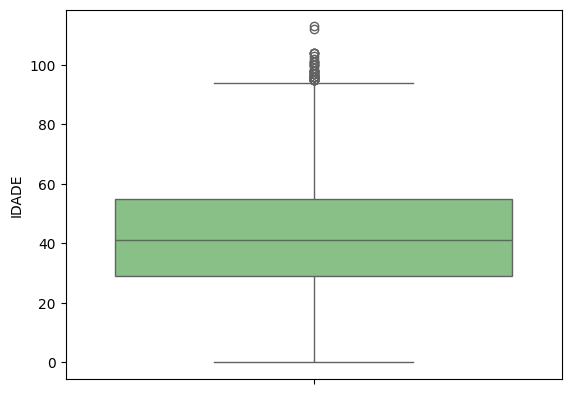

In [245]:
sns.boxplot(y='IDADE', data=bd3)

Qual é o local mais comum para óbitos?

In [246]:
bd3['LOCOCOR'].value_counts()

LOCOCOR
Domicílio                         34347
Outros                             8678
Hospital                           7830
Via pública                        3249
Outro estabelecimento de saúde      866
Name: count, dtype: int64

Text(0.5, 1.0, 'local mais comum para óbitos')

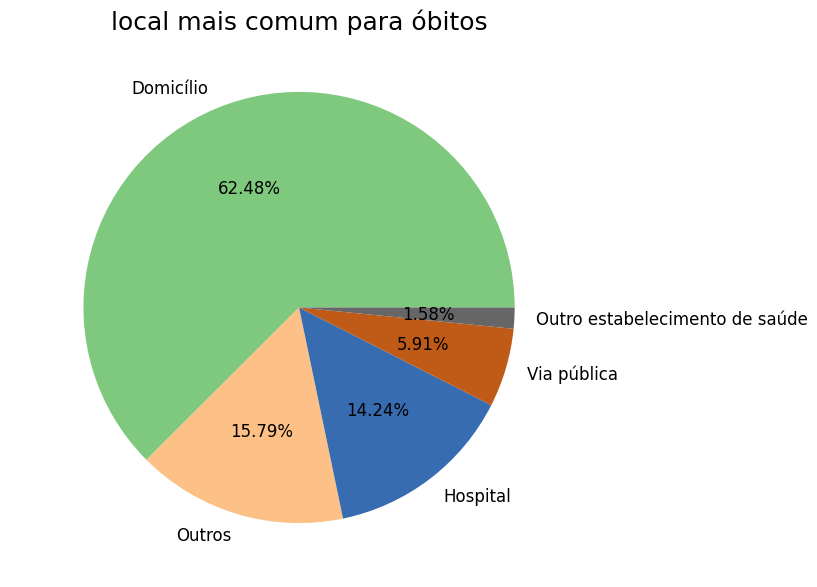

In [247]:
bd3['LOCOCOR'].value_counts().plot.pie(autopct='%0.2f%%',fontsize=12,  figsize=(7, 7), cmap='Accent')

plt.ylabel(' ')

plt.title('local mais comum para óbitos', fontsize=18)

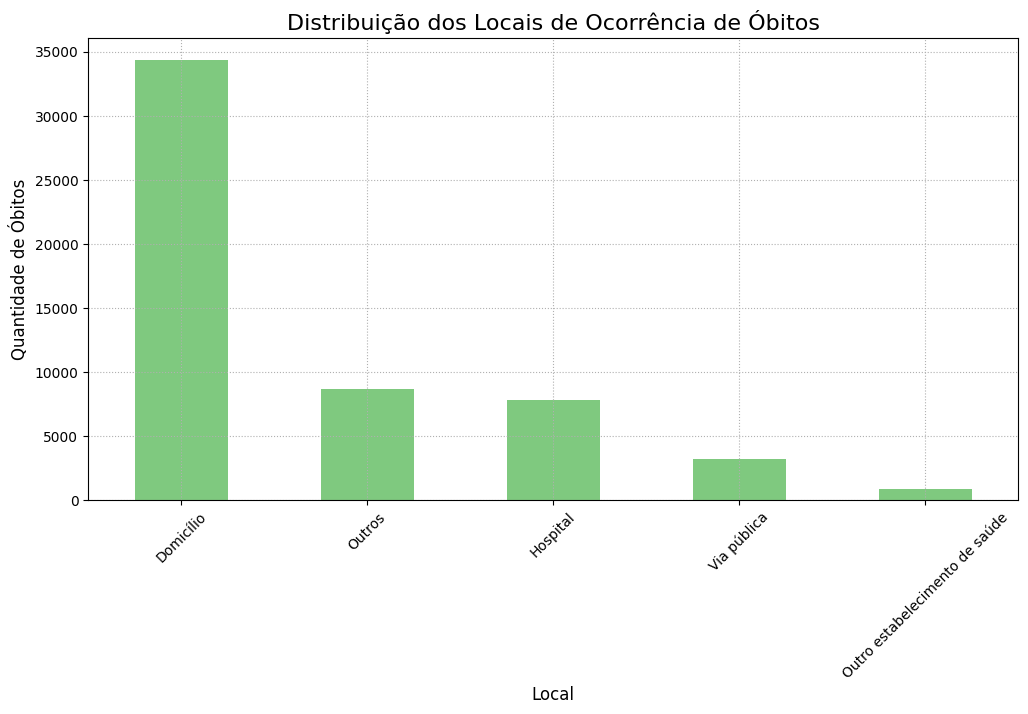

In [248]:
bd3['LOCOCOR'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição dos Locais de Ocorrência de Óbitos', fontsize=16)
plt.xlabel('Local', fontsize=12)
plt.ylabel('Quantidade de Óbitos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle=':')

plt.show()


<Axes: ylabel='count'>

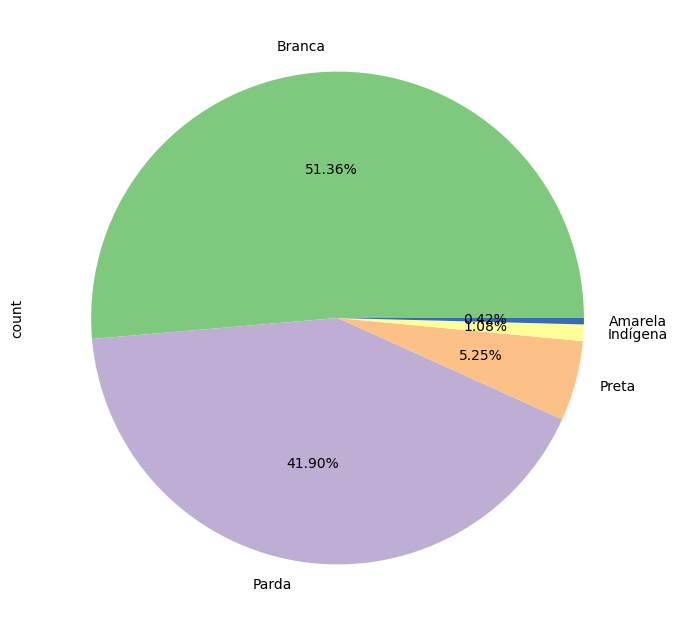

In [249]:
bd3['RACACOR'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

In [250]:
contagem_OCUP_dict = bd3['OCUP'].value_counts().to_dict()

print(contagem_OCUP_dict)

{'DESEMPREGADO': 11163, 'APOSENTADO/PENSIONISTA': 3997, 'ESTUDANTE': 3982, 'DONA DE CASA': 2828, 'TRABALHADOR AGROPECUARIO EM GERAL': 2707, 'TRABALHADOR VOLANTE DA AGRICULTURA': 2572, 'PEDREIRO': 2207, 'DESEMPREGADO CRONICO ': 1336, 'EMPREGADO DOMESTICO NOS SERVICOS GERAIS': 1311, 'REPRESENTANTE COMERCIAL AUTONOMO': 1124, 'IGNORADA': 1087, 'PRODUTOR AGRICOLA POLIVALENTE': 1065, 'COMERCIANTE VAREJISTA': 972, 'SERVENTE DE OBRAS': 851, 'CASEIRO (AGRICULTURA)': 684, 'VENDEDOR DE COMERCIO VAREJISTA': 564, 'MOTORISTA DE CARRO DE PASSEIO': 492, 'VIGILANTE': 457, 'PINTOR DE OBRAS': 389, 'MOTORISTA DE CAMINHAO (ROTAS REGIONAIS E INTERNACIONAIS)': 352, 'MECANICO DE MANUTENCAO DE AUTOMOVEIS E MOTOCICLETAS ': 306, 'ADVOGADO': 267, 'ALIMENTADOR DE LINHA DE PRODUCAO': 257, 'ASSISTENTE ADMINISTRATIVO': 248, 'ELETRICISTA DE INSTALACOES': 243, 'PRODUTOR AGROPECUARIO, EM GERAL': 228, 'SOLDADO DA POLICIA MILITAR': 218, 'CABELEIREIRO': 215, 'COZINHEIRO GERAL': 210, 'CARPINTEIRO': 206, 'TECNICO DE ENFERMAG

In [251]:
empregos = {'DESEMPREGADO': 11163, 
'APOSENTADO/PENSIONISTA': 3997, 
'ESTUDANTE': 3982, 
'DONA DE CASA': 2828, 
'TRABALHADOR AGROPECUARIO EM GERAL': 2707, 
'TRABALHADOR VOLANTE DA AGRICULTURA': 2572, 
'PEDREIRO': 2207, 
'DESEMPREGADO CRONICO ': 1336, 
'EMPREGADO DOMESTICO NOS SERVICOS GERAIS': 1311, 
'REPRESENTANTE COMERCIAL AUTONOMO': 1124, 
'IGNORADA': 1087, 
'PRODUTOR AGRICOLA POLIVALENTE': 1065, 
'COMERCIANTE VAREJISTA': 972, 
'SERVENTE DE OBRAS': 851, 
'CASEIRO (AGRICULTURA)': 684, 
'VENDEDOR DE COMERCIO VAREJISTA': 564, 
'MOTORISTA DE CARRO DE PASSEIO': 492, 
'VIGILANTE': 457, 
'PINTOR DE OBRAS': 389, 
'MOTORISTA DE CAMINHAO (ROTAS REGIONAIS E INTERNACIONAIS)': 352, 
'MECANICO DE MANUTENCAO DE AUTOMOVEIS E MOTOCICLETAS ': 306, 
'ADVOGADO': 267, 
'ALIMENTADOR DE LINHA DE PRODUCAO': 257, 
'ASSISTENTE ADMINISTRATIVO': 248, 
'ELETRICISTA DE INSTALACOES': 243, 
'PRODUTOR AGROPECUARIO, EM GERAL': 228, 
'SOLDADO DA POLICIA MILITAR': 218, 
'CABELEIREIRO': 215, 
'COZINHEIRO GERAL': 210, 
'CARPINTEIRO': 206, 
'TECNICO DE ENFERMAGEM': 203, 
'MARCENEIRO': 203, 
'ADMINISTRADOR': 193, 
'GARCOM': 190, 
'OPERADOR DE MAQUINAS FIXAS, EM GERAL': 187, 
'MOTORISTA DE TAXI': 180, 
'EMPREGADO DOMESTICO DIARISTA': 179, 
'PROFESSOR DA EDUCACAO DO ENSINO FUNDAMENTAL ': 173, 
'SOLDADOR': 166, 
'SERRALHEIRO': 156, 
'AJUDANTE DE MOTORISTA': 156, 
'MOTORISTA DE ONIBUS URBANO': 150, 
'ACOUGUEIRO': 147, 
'PORTEIRO DE EDIFICIOS': 142, 
'ENGENHEIRO CIVIL': 130, 
'VENDEDOR AMBULANTE': 129, 
'FAXINEIRO': 127, 
'ENFERMEIRO': 125, 
'AUXILIAR DE ESCRITORIO, EM GERAL': 123, 
'FRENTISTA': 120, 
'AGENTE DE SEGURANCA': 118, 
'COMERCIANTE ATACADISTA': 117, 
'PINTOR A PINCEL E ROLO (EXCETO OBRAS E ESTRUTURAS METALICAS)': 115, 
'EMPRESARIO DE ESPETACULO': 115, 
'JARDINEIRO': 113, 
'OPERADOR DE CAIXA': 111, 
'MEDICO CLINICO': 109, 
'DIRIGENTE DO SERVICO PUBLICO MUNICIPAL': 103, 
'VIGIA': 99, 
'MOTOCICLISTA NO TRANSPORTE DE DOCUMENTOS E PEQUENOS VOLUMES': 95, 
'MOTORISTA DE FURGAO OU VEICULO SIMILAR': 94, 
'REPOSITOR DE MERCADORIAS': 91, 
'PADEIRO': 91, 
'PESCADOR ARTESANAL DE AGUA DOCE': 90, 
'DIRETOR GERAL DE EMPRESA E ORGANIZACOES ': 88, 
'TRATORISTA AGRICOLA': 80, 
'CORRETOR DE IMOVEIS': 76, 
'ATENDENTE DE FARMACIA - BALCONISTA': 76, 
'AJUSTADOR MECANICO': 75, 
'CONTADOR': 75, 
'MECANICO DE MANUTENCAO DE MAQUINAS, EM GERAL': 75, 
'RECEPCIONISTA, EM GERAL': 73, 
'PROFESSOR DE NIVEL SUPERIOR DO ENSINO FUNDAMENTAL': 70, 
'CAMINHONEIRO AUTONOMO (ROTAS REGIONAIS E INTERNACIONAIS)': 69, 
'MARCADOR DE PRODUTOS (SIDERURGICO E METALURGICO)': 69, 
'BORRACHEIRO': 68, 
'PESCADOR PROFISSIONAL': 67, 
'ZELADOR DE EDIFICIO': 66, 
'COSTUREIRA DE PECAS SOB ENCOMENDA': 64, 
'GARI': 61, 
'FUNILEIRO DE VEICULOS (REPARACAO)': 60, 
'CABO DA POLICIA MILITAR': 60, 
'EMPREGADO DOMESTICO ARRUMADOR': 59, 
'MANICURE': 59, 
'OPERADOR DE TELEMARKETING ATIVO E RECEPTIVO': 58, 
'DIRIGENTE DO SERVICO PUBLICO ESTADUAL E DISTRITAL': 56, 
'CIRURGIAO DENTISTA - CLINICO GERAL': 56, 
'AUXILIAR GERAL DE CONSERVACAO DE VIAS PERMANENTES ': 54, 
'VENDEDOR EM COMERCIO ATACADISTA': 53, 
'FEIRANTE': 52, 
'AUXILIAR DE ENFERMAGEM': 52, 
'TECNICO EM MANUTENCAO DE EQUIPAMENTOS DE INFORMATICA': 51, 
'ALMOXARIFE': 51, 
'COSTUREIRO NA CONFECCAO EM SERIE': 51, 
'GESSEIRO': 50, 
'PESCADOR ARTESANAL DE PEIXES E CAMAROES': 47, 
'VIDRACEIRO': 45, 
'INVESTIGADOR DE POLICIA': 45, 
'TRABALHADOR DA CULTURA DE FUMO': 45, 
'GUARDA-CIVIL MUNICIPAL': 44, 
'PROFESSORES DE CURSOS LIVRES': 44, 
'MONTADOR DE MOVEIS E ARTEFATOS DE MADEIRA': 44, 
'PSICOLOGO CLINICO': 43, 
'DIRIGENTE DO SERVICO PUBLICO FEDERAL': 43, 
'AGENTE DE SEGURANCA PENITENCIARIA': 43, 
'LAVADOR DE VEICULOS': 42, 
'ATENDENTE DE LANCHONETE': 41, 
'TRABALHADOR DE SERVICOS DE MANUTENCAO DE EDIFICIOS': 40, 
'GERENTE COMERCIAL': 40, 
'COBRADOR DE TRANSPORTES COLETIVOS (EXCETO TREM)': 40, 
'AUXILIAR DE PRODUCAO FARMACEUTICA': 40, 
'ENCANADOR': 39, 
'MESTRE (CONSTRUCAO CIVIL)': 39, 
'EMPREGADO DOMESTICO FAXINEIRO': 39, 
'TECNICO ELETRICISTA': 39, 
'MOTORISTA DE ONIBUS RODOVIARIO': 38, 
'AGENTE DE SAUDE PUBLICA': 38, 
'TRABALHADOR DA CULTURA DE CAFE': 38, 
'CATADOR DE MATERIAL RECICLAVEL': 37, 
'GERENTE ADMINISTRATIVO': 37, 
'AUXILIAR DE PESSOAL': 36, 
'PROFESSOR DE NIVEL MEDIO NO ENSINO FUNDAMENTAL': 35, 
'AGENTE PUBLICITARIO': 35, 
'APONTADOR DE PRODUCAO': 35, 
'ELETRICISTA DE MANUTENCAO ELETROELETRONICA': 35, 
'ENGENHEIRO AGRONOMO': 35, 
'TRABALHADOR DA MANUTENCAO DE EDIFICACOES': 34, 
'ANALISTA DE DESENVOLVIMENTO DE SISTEMAS': 34, 
'MEDICO VETERINARIO': 34, 
'CUIDADOR DE IDOSOS': 34, 
'ARQUITETO DE EDIFICACOES': 34, 
'PEDAGOGO': 32, 
'FARMACEUTICO': 30, 
'PROMOTOR DE VENDAS': 29, 
'PEDREIRO DE EDIFICACOES': 28, 
'ARTISTA (ARTES VISUAIS)': 28, 
'TRABALHADOR POLIVALENTE DA CONFECCAO DE CALCADOS': 28, 
'OPERADOR DE MAQUINAS DE BENEFICIAMENTO  AGRICOLAS': 28, 
'JORNALISTA': 28, 
'CONFERENTE DE CARGA E DESCARGA': 28, 
'CHAPEADOR': 28, 
'COSTUREIRA DE REPARACAO DE ROUPAS': 27, 
'EMBALADOR, A MAO': 27, 
'ESTIVADOR': 27, 
'PROFESSOR DE DISCIPLINAS PEDAGOGICAS NO ENSINO MEDIO': 27, 
'ANALISTA DE SISTEMAS DE AUTOMACAO': 26, 
'PORTEIRO (HOTEL)': 26, 
'OPERADOR DE EMPILHADEIRA': 26, 
'ATENDENTE COMERCIAL (AGENCIA POSTAL)': 26, 
'TECNICO MECANICO': 25, 
'AGENTE COMUNITARIO DE SAUDE': 25, 
'CONTRAMESTRE DE ACABAMENTO (INDUSTRIA TEXTIL)': 25, 
'FOTOGRAFO': 25, 
'SAPATEIRO (CALCADOS SOB MEDIDA)': 25, 
'ARTESAO MODELADOR (VIDROS)': 24, 
'COSTUREIRO, A MAQUINA NA CONFECCAO EM SERIE': 24, 
'ELETROTECNICO': 24, 
'ARMADOR DE ESTRUTURA DE CONCRETO': 22, 
'OPERADOR DE MAQUINAS-FERRAMENTA CONVENCIONAIS': 22, 
'PINTOR DE VEICULOS (REPARACAO)': 22, 
'POLICIAL RODOVIARIO FEDERAL': 22, 
'BARBEIRO': 21, 
'SARGENTO DA POLICIA MILITAR': 21, 
'VENDEDOR EM DOMICILIO': 21, 
'FISIOTERAPEUTA': 21, 
'ESCRITURARIO DE BANCO': 21, 
'SECRETARIA EXECUTIVA': 20, 
'MUSICO INTERPRETE CANTOR': 20, 
'TRABALHADOR NA OLERICULTURA (LEGUMES)': 20, 
'ANALISTA DE PRODUTOS BANCARIOS': 20, 
'MONTADOR DE MAQUINAS': 19, 
'ECONOMISTA': 19, 
'TECNICO EM SECRETARIADO': 19, 
'CONFEITEIRO': 19, 
'DESENHISTA INDUSTRIAL (DESIGNER)': 19, 
'OPERADOR DE TELEMARKETING ATIVO': 19, 
'TRABALHADOR DA CULTURA DE ARROZ': 19, 
'DELEGADO DE POLICIA': 18, 
'TRABALHADOR DE PECUARIA POLIVALENTE': 18, 
'TECNICO DE CONTABILIDADE': 18, 
'BIOLOGO': 18, 
'MONTADOR DE ESTRUTURAS METALICAS': 18, 
'TECNICO ELETRONICO': 18, 
'ENGENHEIRO MECANICO': 17, 
'PRACA DO EXERCITO': 17, 
'BABA': 17, 
'ELETRICISTA DE INSTALACOES (EDIFICIOS)': 17, 
'NUTRICIONISTA': 17, 
'INSTRUTOR DE AUTO-ESCOLA': 17, 
'COZINHEIRO DO SERVICO DOMESTICO': 16, 
'CHEFE DE COZINHA': 16, 
'TECNICO AGRICOLA': 16, 
'TECNICO DE MANUTENCAO ELETRONICA': 16, 
'TECNICO EM SEGURANCA NO TRABALHO': 16, 
'CARREGADOR (VEICULOS DE TRANSPORTES TERRESTRES)': 16, 
'OPERADOR DE MAQUINA DE ABRIR VALAS': 16, 
'CARREGADOR (ARMAZEM)': 16, 
'TECNICO EM RADIOLOGIA E IMAGENOLOGIA': 16, 
'ASSISTENTE SOCIAL': 16, 
'TECNICO DE APOIO AO USUARIO DE INFORMATICA (HELPDESK)': 16, 
'FERRAMENTEIRO': 16, 
'TRABALHADOR DA PECUARIA (BOVINOS LEITE)': 16, 
'CORRETOR DE SEGUROS': 15, 
'ESTOFADOR DE MOVEIS': 15, 
'CARTEIRO': 15, 
'ANALISTA FINANCEIRO (INSTITUICOES FINANCEIRAS)': 15, 
'CERAMISTA': 15, 
'OFICIAL DE JUSTICA': 15, 
'MARMORISTA (CONSTRUCAO)': 15, 
'SECRETARIO - EXECUTIVO': 15, 
'TRABALHADOR DA PECUARIA (BOVINOS CORTE)': 15, 
'MUSICO INTERPRETE INSTRUMENTISTA': 14, 
'TRABALHADOR DA CULTURA DE CANA-DE-ACUCAR': 14, 
'CONFERENTE DE SERVICOS BANCARIOS': 14, 
'PROFESSOR DE EDUCACAO FISICA DO ENSINO FUNDAMENTAL': 14, 
'COLETOR DE LIXO': 14, 
'COPEIRO': 14, 
'GERENTE DE VENDAS': 14, 
'MOTORNEIRO': 14, 
'GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO)': 14, 
'ENGENHEIRO ELETRICISTA': 13, 
'SOLDADO BOMBEIRO MILITAR': 13, 
'BARMAN': 13, 
'TELEFONISTA': 13, 
'GARIMPEIRO': 13, 
'OPERADOR DE MAQUINAS DE CONSTRUCAO CIVIL E MINERACAO': 13, 
'OPERADOR DE CALDEIRA': 13, 
'ELETRICISTA DE INSTALACOES (VEICULOS AUTOMOTORES )': 13, 
'ESTETICISTA': 13, 
'TOPOGRAFO': 13, 
'MECANICO DE VEICULOS AUTOMOTORES A DIESEL (EXCETO TRATORES)': 13, 
'TECNICO DE TELECOMUNICACOES (TELEFONIA)': 13, 
'MONTADOR DE ANDAIMES (EDIFICACOES)': 13, 
'OFICIAL DO EXERCITO': 13, 
'MANOBRADOR': 13, 
'AJUDANTE DE DESPACHANTE ADUANEIRO': 13, 
'CAIXA DE BANCO': 13, 
'ARMADOR DE ESTRUTURA DE CONCRETO ARMADO': 12, 
'ATENDENTE DE AGENCIA': 12, 
'AUXILIAR DE CONTABILIDADE': 12, 
'ENGENHEIRO QUIMICO': 12, 
'CRIADOR EM PECUARIA POLIVALENTE': 12, 
'OPERADOR DE MAQUINAS OPERATRIZES': 12, 
'ACABADOR DE CALCADOS': 12, 
'PORTEIRO DE LOCAIS DE DIVERSAO': 12, 
'CHAVEIRO': 11, 
'PROTETICO DENTARIO': 11, 
'SERRADOR DE MADEIRA': 11, 
'AGENTE FUNERARIO': 11, 
'MUSICO ARRANJADOR': 11, 
'CALDEIREIRO (CHAPAS DE FERRO E ACO)': 11, 
'TECNICO EM MANUTENCAO DE MAQUINAS': 11, 
'SUPERVISOR ADMINISTRATIVO': 11, 
'QUIMICO': 11, 
'COBRADOR INTERNO': 10, 
'AGENTE DE POLICIA FEDERAL': 10, 
'TECNICO DE OPERACOES E SERVICOS BANCARIOS - CREDITO IMOBILIARIO': 10, 
'TRABALHADOR DO BENEFICIAMENTO DE FUMO': 10, 
'TECNICO MECANICO (CALEFACAO, VENTILACAO E REFRIGERACAO)': 10, 
'MECANICO DE REFRIGERACAO': 10, 
'CONTINUO': 10, 
'PROGRAMADOR DE SISTEMAS DE INFORMACAO': 10, 
'DESPACHANTE DOCUMENTALISTA': 10, 
'PROFESSOR DE EDUCACAO FISICA NO ENSINO MEDIO': 10, 
'MONTADOR DE EQUIPAMENTOS ELETRONICOS (MAQUINAS INDUSTRIAIS)': 10, 
'MINISTRO DE CULTO RELIGIOSO': 10, 
'VENDEDOR PRACISTA': 10, 
'COZINHADOR (CONSERVACAO DE ALIMENTOS)': 10, 
'MAGAREFE': 10, 
'ESTAMPADOR DE TECIDO': 9, 
'AGENTE FISCAL DE QUALIDADE': 9, 
'PROFESSOR DE ENSINO SUPERIOR NA AREA DE PRATICA DE ENSINO': 9, 
'DESIGNER DE INTERIORES': 9, 
'MECANICO DE MANUTENCAO DE MAQUINAS CORTADORAS DE GRAMA': 9, 
'CABO BOMBEIRO MILITAR': 9, 
'BOIADEIRO': 9, 
'TECNICO EM ADMINISTRACAO': 9, 
'POLIDOR DE METAIS': 9, 
'AUXILIAR DE SERVICOS DE IMPORTACAO E EXPORTACAO': 9, 
'ESCREVENTE': 9, 
'TECNICO EM MECANICA DE PRECISAO': 8, 
'ANALISTA DE SUPORTE COMPUTACIONAL': 8, 
'VIGIA PORTUARIO': 8, 
'GERENTE DE LOJA E SUPERMERCADO': 8, 
'VAQUEADOR DE COUROS E PELES': 8, 
'AGENTE DE VIAGEM': 8, 
'GERENTE FINANCEIRO': 8, 
'DESENHISTA TECNICO': 8, 
'TECNICO DE OBRAS CIVIS': 8, 
'OPERADOR DE PRODUCAO (QUIMICA, PETROQUIMICA E AFINS)': 8, 
'DIGITADOR': 8, 
'ALFAIATE': 8, 
'ESCRIVAO DE POLICIA': 8, 
'AUXILIAR DE JUDICIARIO': 8, 
'TECNICO AGROPECUARIO': 8, 
'OPERADOR DE ESCAVADEIRA': 8, 
'AUXILIAR DE PROCESSAMENTO DE FUMO': 8, 
'OURIVES': 8, 
'INSPETOR DE QUALIDADE': 8, 
'OLEIRO (FABRICACAO DE TIJOLOS)': 8, 
'MEDICO PEDIATRA': 7, 
'AUXILIAR DE FATURAMENTO': 7, 
'PROFESSOR DE ARTES NO ENSINO MEDIO': 7, 
'TECELAO (TEAR AUTOMATICO)': 7, 
'CORTADOR DE TAPECARIA': 7, 
'OPERADOR DE MOTOSSERRA': 7, 
'AVICULTOR': 7, 
'TECNICO GRAFICO': 7, 
'FUNILEIRO INDUSTRIAL': 7, 
'LUBRIFICADOR INDUSTRIAL': 7, 
'BIBLIOTECARIO': 7, 
'GERENTE DE PRODUCAO E OPERACOES': 7, 
'FORNEIRO DE REAQUECIMENTO E TRATAMENTO TERMICO NA METALURGIA': 7, 
'MARINHEIRO DE CONVES (MARITIMO E FLUVIARIO)': 7, 
'MEDICO GENERALISTA': 7, 
'BORDADOR, A MAQUINA': 7, 
'FISCAL DE TRIBUTOS MUNICIPAL': 7, 
'ARMAZENISTA': 7, 
'IMPRESSOR (SERIGRAFIA)': 7, 
'LOCUTOR DE RADIO E TELEVISAO': 7, 
'DIRETOR ADMINISTRATIVO': 7, 
'PROFESSOR DE NIVEL MEDIO NA EDUCACAO INFANTIL': 7, 
'TECELAO DE TAPETES, A MAO': 7, 
'INSPETOR DE ALUNOS DE ESCOLA PUBLICA': 7, 
'TRABALHADOR NA PRODUCAO DE MUDAS E SEMENTES': 7, 
'CALDEIREIRO (CHAPAS DE COBRE)': 7, 
'ASSISTENTE DE VENDAS': 7, 
'PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONALIZANTE': 7, 
'MEDICO CIRURGIAO GERAL': 7, 
'TECNICO EM ESTRUTURAS METALICAS': 7, 
'ENGENHEIRO METALURGISTA': 6, 
'SOLDADOR ELETRICO': 6, 
'DOMADOR DE ANIMAIS (CIRCENSE)': 6, 
'PILOTO DE AERONAVES': 6, 
'PROFESSOR LEIGO NO ENSINO FUNDAMENTAL': 6, 
'SERINGUEIRO': 6, 
'CAFEICULTOR': 6, 
'INSTRUMENTADOR CIRURGICO': 6, 
'AUXILIAR DE PROTESE DENTARIA': 6, 
'JUIZ DE DIREITO': 6, 
'ENCARREGADO DE MANUTENCAO MECANICA DE SISTEMAS OPERACIONAIS': 6, 
'DIRETOR COMERCIAL': 6, 
'OPERADOR DE CARREGADEIRA': 6, 
'OPERADOR DE COBRANCA BANCARIA': 6, 
'SUPERVISOR DE VENDAS COMERCIAL': 6, 
'VEREADOR': 6, 
'TECNICO QUIMICO': 6, 
'DESPACHANTE ADUANEIRO': 6, 
'PRENSISTA (OPERADOR DE PRENSA)': 6, 
'TECELAO (REDES)': 6, 
'TRABALHADOR DE EXTRACAO FLORESTAL, EM GERAL': 6, 
'GERENTE DE MARKETING': 6, 
'CAMAREIRO DE HOTEL': 6, 
'TECNICO DE MANUTENCAO DE SISTEMAS E INSTRUMENTOS': 6, 
'REVISOR': 6, 
'MAQUINISTA DE TREM': 6, 
'AGENTE DE VENDAS DE SERVICOS': 6, 
'DESOSSADOR': 6, 
'PROFESSOR DE ENSINO SUPERIOR NA AREA DE DIDATICA': 6, 
'MINEIRO': 6, 
'CHEFE DE SERVICOS BANCARIOS': 5, 
'INSTALADOR DE TUBULACOES': 5, 
'MOTORISTA OPERACIONAL DE GUINCHO': 5, 
'ZOOTECNISTA': 5, 
'CONTROLADOR DE ENTRADA E SAIDA': 5, 
'TECELAO (TEAR MANUAL)': 5, 
'PROFESSOR DE NIVEL SUPERIOR NA EDUCACAO INFANTIL': 5, 
'MECANICO DE MANUTENCAO DE BICICLETAS E VEICULOS SIMILARES': 5, 
'TECNICO EM ELETROMECANICA': 5, 
'COZINHADOR DE CARNES': 5, 
'AUXILIAR DE LABORATORIO DE ANALISES CLINICAS': 5, 
'FONOAUDIOLOGO': 5, 
'OPERADOR DE ATENDIMENTO AEROVIARIO': 5, 
'AUXILIAR DE LAVANDERIA': 5, 
'TECNOLOGO EM ELETRONICA': 5, 
'CARPINTEIRO DE OBRAS': 5, 
'ANALISTA DE REDES E DE COMUNICACAO DE DADOS': 5, 
'OPERADOR DE TELEMARKETING RECEPTIVO': 5, 
'ENGENHEIRO FLORESTAL': 5, 
'OLEIRO (FABRICACAO DE TELHAS)': 5, 
'AJUSTADOR MECANICO (USINAGEM EM BANCADA)': 5, 
'ASSISTENTE DE LABORATORIO INDUSTRIAL': 5, 
'CONDUTOR DE VEICULOS DE TRACAO ANIMAL (RUAS E ESTRADAS)': 5, 
'ARQUITETO URBANISTA': 5, 
'ATLETA PROFISSIONAL (OUTRAS MODALIDADES)': 5, 
'PINTOR DE LETREIROS': 5, 
'MASSAGISTA': 5, 
'TRABALHADOR DA CULTURA DE MILHO E SORGO': 5, 
'ELETRICISTA DE MANUTENCAO DE LINHAS ELETRICAS': 5, 
'AUXILIAR DE CORTE (PREPARACAO DA CONFECCAO DE ROUPAS)': 5, 
'PINTOR DE CERAMICA, A PINCEL': 5, 
'MECANICO DE MANUTENCAO DE MAQUINAS AGRICOLAS': 5, 
'RELOJOEIRO (REPARACAO)': 5, 
'MONTADOR DE EQUIPAMENTOS ELETRICOS': 5, 
'RELACOES PUBLICAS': 5, 
'INSTALADOR DE SOM E ACESSORIOS DE VEICULOS': 5, 
'GERENTE DE PRODUCAO E OPERACOES AGROPECUARIAS': 4, 
'PROJETISTA DE MOVEIS': 4, 
'PROFESSOR DE BIOLOGIA NO ENSINO MEDIO': 4, 
'LIMPADOR DE VIDROS': 4, 
'AUDITOR (CONTADORES E AFINS)': 4, 
'MEDICO GINECOLOGISTA E OBSTETRA': 4, 
'SUPERVISOR DE CARGA E DESCARGA': 4, 
'MOLDADOR DE PLASTICO POR INJECAO': 4, 
'PROFESSOR DE ADMINISTRACAO': 4, 
'ENCARREGADO GERAL DE OPERACOES DE CONSERVACAO DE VIAS ': 4, 
'TECNICO MECANICO (MOTORES)': 4, 
'ESCRITURARIO EM ESTATISTICA': 4, 
'ORIENTADOR EDUCACIONAL': 4, 
'CALCETEIRO': 4, 
'OPERADOR DE BOMBA DE CONCRETO': 4, 
'DESENHISTA TECNICO (ARTES GRAFICAS)': 4, 
'ANALISTA DE CREDITO (INSTITUICOES FINANCEIRAS)': 4, 
'FARMACEUTICO BIOQUIMICO': 4, 
'ATOR': 4, 
'LAVADEIRO, EM GERAL': 4, 
'BAILARINO (EXCETO DANCAS POPULARES)': 4, 
'COSTUREIRO DE ROUPA DE COURO E PELE': 4, 
'TRABALHADOR NA OLERICULTURA (FRUTOS E SEMENTES)': 4, 
'ARQUITETO DE INTERIORES': 4, 
'PROMOTOR DE JUSTICA': 4, 
'MECANICO DE MANUTENCAO DE VEICULOS FERROVIARIOS': 4, 
'COMISSARIO DE VOO': 4, 
'CORONEL BOMBEIRO MILITAR': 4, 
'PINTOR DE VEICULOS (FABRICACAO)': 4, 
'PEDREIRO (CHAMINES INDUSTRIAIS)': 4, 
'OFICIAL DA AERONAUTICA': 4, 
'AUXILIAR DE FARMACIA DE MANIPULACAO': 4, 
'ENGENHEIRO MECANICO INDUSTRIAL': 4, 
'APONTADOR DE MAO-DE-OBRA': 4, 
'TECNICO DE OPERACOES E SERVICOS BANCARIOS - CAMBIO': 4, 
'MONTADOR DE EQUIPAMENTOS ELETRONICOS': 4, 
'ADESTRADOR DE ANIMAIS': 4, 
'MASSEIRO (MASSAS ALIMENTICIAS)': 4, 
'PESQUISADOR EM HISTORIA': 4, 
'MONTADOR DE MAQUINAS, MOTORES E ACESSORIOS': 4, 
'INSPETOR DE ALUNOS DE ESCOLA PRIVADA': 4, 
'ARQUITETO PAISAGISTA': 4, 
'CARVOEIRO': 4, 
'TECNICO EM HIGIENE DENTAL': 4, 
'SARGENTO BOMBEIRO MILITAR': 4, 
'OPERADOR DE PONTE ROLANTE': 4, 
'DEFENSOR PUBLICO': 4, 
'TECNICO DE COMUNICACAO DE DADOS': 4, 
'MONTADOR DE FILMES': 4, 
'TECNICO EM LABORATORIO DE FARMACIA': 4, 
'CONFERENTE-EXPEDIDOR DE ROUPAS (LAVANDERIAS)': 4, 
'TECELAO DE MALHAS, A MAQUINA': 4, 
'IMPRESSOR TIPOGRAFICO': 4, 
'TRATADOR DE ANIMAIS': 4, 
'FORNEIRO DE FUNDICAO (FORNO DE REDUCAO)': 4, 
'FORJADOR': 4, 
'PROFESSOR DE DANCA': 4, 
'SUPERVISOR DE ALMOXARIFADO': 4, 
'TRADUTOR': 4, 
'ENCARREGADO DE ACABAMENTO DE CHAPAS E METAIS (TEMPERA)': 4, 
'TECNICO EM SOLDAGEM': 4, 
'PROFESSOR DE HISTORIA DO ENSINO FUNDAMENTAL': 3, 
'OPERADOR DE PA CARREGADEIRA': 3, 
'AUXILIAR DE BANCO DE SANGUE': 3, 
'SECADOR DE MADEIRA': 3, 
'PRIMEIRO TENENTE DE POLICIA MILITAR': 3, 
'PERITO CRIMINAL': 3, 
'OPERADOR POLIVALENTE DA INDUSTRIA TEXTIL': 3, 
'DESENHISTA COPISTA': 3, 
'ENCARREGADO DE MANUTENCAO DE INSTRUMENTOS DE MEDICAO': 3, 
'PINTOR, A PISTOLA (EXCETO OBRAS E ESTRUTURAS METALICAS)': 3, 
'TECNICO EM AGRIMENSURA': 3, 
'OPERADOR ELETROMECANICO': 3, 
'SOCIOLOGO': 3, 
'PODOLOGO': 3, 
'TECNICO DE REDE (TELECOMUNICACOES)': 3, 
'AJUDANTE DE CARVOARIA': 3, 
'TRABALHADOR NO CULTIVO DE MUDAS': 3, 
'ENGRAXATE': 3, 
'APRESENTADOR DE EVENTOS': 3, 
'BOMBEIRO DE SEGURANCA DO TRABALHO': 3, 
'MECANICO DE MANUTENCAO DE APARELHOS DE CLIMATIZACAO ': 3, 
'OPERADOR DE TORNO COM COMANDO NUMERICO': 3, 
'OPERADOR DE TELEMARKETING TECNICO': 3, 
'GUIA DE TURISMO': 3, 
'PROFESSOR DA AREA DE MEIO AMBIENTE': 3, 
'RETALHADOR DE CARNE': 3, 
'OPERADOR DE ACABAMENTO (INDUSTRIA GRAFICA)': 3, 
'ORGANIZADOR DE EVENTO': 3, 
'AUDITOR-FISCAL DA PREVIDENCIA SOCIAL': 3, 
'FISICO': 3, 
'COMPRADOR': 3, 
'TECNICO DE MANUTENCAO ELETRICA DE MAQUINA': 3, 
'ECONOMISTA INDUSTRIAL': 3, 
'ATENDENTE DE CONSULTORIO DENTARIO': 3, 
'GARCOM (SERVICOS DE VINHOS)': 3, 
'PROMOTOR DE VENDAS ESPECIALIZADO': 3, 
'MAQUIADOR': 3, 
'COBRADOR EXTERNO': 3, 
'ENGENHEIRO MECANICO AUTOMOTIVO': 3, 
'TRABALHADOR NO CULTIVO DE ARVORES FRUTIFERAS': 3, 
'MECANICO DE MANUTENCAO DE MOTOCICLETAS': 3, 
'ASSISTENTE TECNICO DE SEGUROS': 3, 
'TABELIAO DE NOTAS': 3, 
'PASSADEIRA DE PECAS CONFECCIONADAS': 3, 
'PROFESSOR DE LINGUA PORTUGUESA DO ENSINO FUNDAMENTAL': 3, 
'ATLETA PROFISSIONAL DE FUTEBOL': 3, 
'FISCAL DE TRANSPORTES COLETIVOS (EXCETO TREM)': 3, 
'TECNICO DE OPERACOES E SERVICOS BANCARIOS - RENDA FIXA E VARIAVEL': 3, 
'OPERADOR DE TRATOR DE LAMINA': 3, 
'ARTISTA DE CIRCO (OUTROS)': 3, 
'AGENTE DE HIGIENE E SEGURANCA': 3, 
'TECNICO EM PATOLOGIA CLINICA': 3, 
'ANALISTA DE NEGOCIOS': 3, 
'FILOSOFO': 3, 
'TOSADOR DE ANIMAIS DOMESTICOS': 3, 
'OPERADOR DE MAQUINA DE COSTURA DE ACABAMENTO': 3, 
'AGENTE DE TRANSITO': 3, 
'LOCALIZADOR (COBRADOR)': 3, 
'PEDREIRO (MATERIAL REFRATARIO)': 3, 
'OPERADOR DE MAQUINA DE USINAGEM MADEIRA, EM GERAL': 3, 
'CORTADOR DE PEDRAS': 3, 
'SUPERVISOR DE VIGILANTES': 3, 
'OFICIAL DA MARINHA': 3, 
'SUPERVISOR DE CAIXAS E BILHETEIROS (EXCETO CAIXA DE BANCO)': 3, 
'MEDICO DERMATOLOGISTA': 3, 
'PAPILOSCOPISTA POLICIAL': 3, 
'CORTADOR DE LAMINADOS DE MADEIRA': 3, 
'VENDEDOR PERMISSIONARIO': 3, 
'TECNICO DE LABORATORIO INDUSTRIAL': 3, 
'CORTADOR DE ROUPAS': 3, 
'AGENTE DE DEFESA AMBIENTAL': 3, 
'OPERADOR DE GUINDASTE (FIXO)': 3, 
'MONTADOR DE CALCADOS': 3, 
'GERENTE DE RESTAURANTE': 3, 
'COMPOSITOR': 3, 
'DIRETOR ADMINISTRATIVO E FINANCEIRO': 3, 
'PROFESSOR DE MUSICA NO ENSINO SUPERIOR': 3, 
'MUSICOLOGO': 3, 
'GERENTE DE SUPORTE TECNICO DE TECNOLOGIA DA INFORMACAO': 3, 
'PREFEITO': 3, 
'ARTIFICE DO COURO': 3, 
'MEDICO ORTOPEDISTA E TRAUMATOLOGISTA': 2, 
'SALVA-VIDAS': 2, 
'ENGENHEIRO AGRIMENSOR': 2, 
'PESQUISADOR EM BIOLOGIA HUMANA': 2, 
'TORNEIRO (LAVRA DE PEDRA)': 2, 
'PROGRAMADOR DE MULTIMIDIA': 2, 
'PROFESSOR DE LINGUA INGLESA': 2, 
'SECRETARIO BILINGUE': 2, 
'OPERADOR DE INSTALACAO DE AR-CONDICIONADO': 2, 
'ELETROTENICO NA FABRICACAO DE MAQUINAS E EQUIPAMENTOS': 2, 
'GARAGISTA': 2, 
'PREPARADOR FISICO': 2, 
'TRABALHADOR DO ACABAMENTO DE ARTEFATOS DE TECIDOS E COUROS': 2, 
'OPERADOR DE CRISTALIZACAO NA REFINACAO DE ACUCAR': 2, 
'INSTALADOR-REPARADOR DE REDES TELEFONICAS': 2, 
'SALGADOR DE ALIMENTOS': 2, 
'JORNALEIRO (EM BANCA DE JORNAL)': 2, 
'OPERADOR DE COLHEITADEIRA': 2, 
'MODELADOR DE METAIS (FUNDICAO)': 2, 
'OPERADOR DE TRATOR (MINAS E PEDREIRAS)': 2, 
'COMISSARIO DE TREM': 2, 
'ATLETA PROFISSIONAL DE LUTA': 2, 
'MONTADOR DE VEICULOS (LINHA DE MONTAGEM)': 2, 
'MECANICO DE MANUTENCAO DE MAQUINAS-FERRAMENTAS': 2, 
'OPERADOR DE INSTALACAO DE REFRIGERACAO': 2, 
'TRABALHADOR DA PECUARIA (EQUINOS)': 2, 
'TECNICO DE CONTROLE DE MEIO AMBIENTE': 2, 
'BALANCEIRO': 2, 
'SUPERVISOR DE VENDAS DE SERVICOS': 2, 
'ENGENHEIRO ELETRONICO': 2, 
'MESTRE DE LINHAS (FERROVIAS)': 2, 
'TECELAO (RENDAS E BORDADOS)': 2, 
'AVALIADOR DE BENS MOVEIS': 2, 
'AFRETADOR': 2, 
'CRIADOR DE BOVINOS (CORTE)': 2, 
'ENCARREGADO DE MANUTENCAO ELETRICA DE VEICULOS': 2, 
'AUXILIAR DE MAQUINISTA DE TREM': 2, 
'OPERADOR DE DESEMPENADEIRA NA USINAGEM CONVENCIONAL': 2, 
'EMISSOR DE PASSAGENS': 2, 
'DIRETOR DE MANUTENCAO': 2, 
'MEDICO EM MEDICINA INTENSIVA': 2, 
'OPERADOR DE LINHA DE MONTAGEM (APARELHOS ELETRICOS)': 2, 
'OPERADOR DE MAQUINA PERFURATRIZ': 2, 
'PREPARADOR DE ESTRUTURAS METALICAS': 2, 
'DIRETOR FINANCEIRO': 2, 
'ANALISTA DE PESQUISA DE MERCADO': 2, 
'DESENHISTA PROJETISTA DE CONSTRUCAO CIVIL': 2, 
'TIPOGRAFO': 2, 
'MEDICO CIRURGIAO PLASTICO': 2, 
'BILHETEIRO (ESTACOES DE METRO, FERROVIARIAS E ASSEMELHADAS)': 2, 
'JOALHEIRO': 2, 
'SINALEIRO (PONTE-ROLANTE)': 2, 
'MODELO DE MODAS': 2, 
'CENOTECNICO (CINEMA, VIDEO, TELEVISAO, TEATRO E ESPETACULOS)': 2, 
'TECNOLOGO EM ELETRICIDADE': 2, 
'DANCARINO TRADICIONAL': 2, 
'PILOTO COMERCIAL (EXCETO LINHAS AEREAS)': 2, 
'PESCADOR INDUSTRIAL': 2, 
'GERENTE DE CREDITO E COBRANCA': 2, 
'DESENHISTA PROJETISTA DE ARQUITETURA': 2, 
'PESCADOR ARTESANAL DE LAGOSTAS': 2, 
'CONSULTOR CONTABIL (TECNICO)': 2, 
'AGENTE DE ESTACAO (FERROVIA E METRO)': 2, 
'OPERADOR DE DRAGA': 2, 
'TESOUREIRO DE BANCO': 2, 
'ENCARREGADO DE COSTURA NA CONFECCAO DO VESTUARIO': 2, 
'CRIADOR DE ANIMAIS DOMESTICOS': 2, 
'OPERADOR DE TIME DE MONTAGEM': 2, 
'PREPARADOR DE MAQUINAS-FERRAMENTA': 2, 
'COORDENADOR PEDAGOGICO': 2, 
'MAJOR DA POLICIA MILITAR': 2, 
'CAPITAO DA POLICIA MILITAR': 2, 
'OPERADOR DE ALAMBIQUE DE FUNCIONAMENTO CONTINUO ': 2, 
'REBARBADOR DE METAL': 2, 
'PROFESSOR DE ESTATISTICA (NO ENSINO SUPERIOR)': 2, 
'INSTALADOR-REPARADOR DE REDES E CABOS TELEFONICOS': 2, 
'ESCRIVAO JUDICIAL': 2, 
'LEITURISTA': 2, 
'MESTRE SERRALHEIRO': 2, 
'TECNICO DE LABORATORIO DE ANALISES FISICO-QUIMICAS': 2, 
'PROGRAMADOR DE INTERNET': 2, 
'DIRETOR DE SERVICOS DE INFORMATICA': 2, 
'LADRILHEIRO': 2, 
'OPERADOR DE MAQUINA RODOFERROVIARIA': 2, 
'ANALISTA DE RECURSOS HUMANOS': 2, 
'OPERADOR DE NEGOCIOS': 2, 
'OPERADOR DE CAMINHAO (MINAS E PEDREIRAS)': 2, 
'OPERADOR DE SISTEMAS DE PROVA (ANALOGICO E DIGITAL)': 2, 
'PROFESSOR DE FILOSOFIA DO ENSINO SUPERIOR': 2, 
'GERENTE DE ALMOXARIFADO': 2, 
'PROFESSOR DE DESENHO TECNICO': 2, 
'PSICANALISTA': 2, 
'TORNEIRO NA USINAGEM CONVENCIONAL DE MADEIRA': 2, 
'COZINHEIRO INDUSTRIAL': 2, 
'PRACA DA AERONAUTICA': 2, 
'LUBRIFICADOR DE VEICULOS AUTOMOTORES (EXCETO EMBARCACOES)': 2, 
'TECELAO DE TAPETES, A MAQUINA': 2, 
'OPERADOR DE PAINEL DE CONTROLE': 2, 
'MEDICO GASTROENTEROLOGISTA': 2, 
'ADVOGADO DE EMPRESA': 2, 
'ASCENSORISTA': 2, 
'PIROTECNICO': 2, 
'MECANICO MONTADOR DE MOTORES DE EXPLOSAO E DIESEL': 2, 
'MONTADOR DE EQUIPAMENTOS ELETRICOS ': 2, 
'OPERADOR DE EQUIPAMENTOS DE PREPARACAO DE AREIA': 2, 
'REPARADOR DE RADIO, TV E SOM': 2, 
'COSTUREIRO DE ROUPAS DE COURO E PELE': 2, 
'MEDICO PSIQUIATRA': 2, 
'INSTRUTOR DE CURSOS LIVRES': 2, 
'LOCUTOR PUBLICITARIO DE RADIO E TELEVISAO': 2, 
'CONTROLADOR DE PRAGAS': 2, 
'ADVOGADO (DIREITO CIVIL)': 2, 
'TECNICO OPERACIONAL DE SERVICOS DE CORREIOS': 2, 
'DEMONSTRADOR DE MERCADORIAS': 2, 
'MEDICO OFTALMOLOGISTA': 2, 
'OPERADOR DE IMPERMEABILIZADOR DE TECIDOS': 2, 
'OPERADOR DE MAQUINA PERFURADORA (MINAS E PEDREIRAS)': 2, 
'TECNICO DE MANUTENCAO ELETRICA': 2, 
'COMENTARISTA DE RADIO E TELEVISAO': 2, 
'CUMIM': 2, 
'OPERADOR DE RETIFICADORA COM COMANDO NUMERICO': 2, 
'DESENHISTA DETALHISTA': 2, 
'MECANICO DE MANUTENCAO DE AERONAVES, EM GERAL': 2, 
'MEDICO CIRURGIAO PEDIATRICO': 2, 
'PRODUTOR DE TEATRO': 2, 
'CORRETOR DE VALORES, ATIVOS FINANCEIROS E DERIVATIVOS': 2, 
'AUXILIAR DE CARTORIO': 2, 
'GUARDADOR DE VEICULOS': 2, 
'GERENTE DE PRODUCAO E OPERACOES DA CONSTRUCAO CIVIL': 2, 
'OPERADOR DE BETONEIRA': 2, 
'TELEOPERADOR': 2, 
'DESIGNER DE VITRINES': 2, 
'PROFISSIONAL DO SEXO': 2, 
'PROFESSOR DE EDUCACAO FISICA NO ENSINO SUPERIOR': 2, 
'CLASSIFICADOR E EMPILHADOR DE TIJOLOS REFRATARIOS': 2, 
'ASSESSOR DE IMPRENSA': 2, 
'PINTOR DE ESTRUTURAS METALICAS': 2, 
'GEOLOGO': 2, 
'GERENTE DE BAR': 2, 
'TRABALHADOR NA CULTURA DE SOJA': 2, 
'SUBTENENTE DA POLICIA MILITAR': 2, 
'CONTROLADOR DE TRAFEGO AEREO': 2, 
'CRIADOR DE SUINOS': 2, 
'AUXILIAR DE SERVICOS JURIDICOS': 2, 
'TECNICO EM OPERACAO DE EQUIPAMENTOS PARA TELEVISAO ': 2, 
'ASSENTADOR DE CANALIZACAO (EDIFICACOES)': 2, 
'TRABALHADOR DA AVICULTURA DE CORTE': 2, 
'DESENHISTA TECNICO (ILUSTRACOES ARTISTICAS)': 2, 
'TRABALHADOR DA CULTURA DE ESPECIARIAS': 2, 
'GERENTE DE PRODUTOS BANCARIOS': 2, 
'PROFESSOR DE ENSINO SUPERIOR NA AREA DE ORIENTACAO EDUCACIONAL': 2, 
'SUPERVISOR DE TELEMARKETING E ATENDIMENTO': 2, 
'ENCARREGADO DE CORTE NA CONFECCAO DO VESTUARIO': 2, 
'ATENDENTE DE ENFERMAGEM': 2, 
'ESCRITOR DE NAO FICCAO': 2, 
'ARQUIVISTA': 2, 
'PREPARADOR DE CALCADOS': 2, 
'PLATAFORMISTA (PETROLEO)': 2, 
'SUPERVISOR DE TRANSPORTES': 2, 
'PROFESSOR DE MATEMATICA DO ENSINO FUNDAMENTAL': 2, 
'APRESENTADOR DE PROGRAMAS DE RADIO': 2, 
'CIRURGIAO DENTISTA - ODONTOLOGISTA LEGAL': 2, 
'OPERADOR DE TORNO AUTOMATICO (USINAGEM DE MADEIRA)': 2, 
'TRABALHADOR DA EXPLORACAO DE ACAI': 2, 
'VIDRACEIRO (VITRAIS)': 2, 
'CRONOMETRISTA': 2, 
'TECNICO EM CALDEIRARIA': 2, 
'LIMPADOR DE FACHADAS': 2, 
'MONITOR DE TELEATENDIMENTO': 2, 
'CONSULTOR JURIDICO': 2, 
'GERENTE DE HOTEL': 2, 
'OPERADOR DE MAQUINA DE LAVAR FIOS E TECIDOS': 2, 
'ECONOMISTA DOMESTICO': 2, 
'SUPERVISOR DE COMPRAS': 2, 
'PROCURADOR DE JUSTICA': 2, 
'ELETRICISTA DE BORDO': 2, 
'TINGIDOR DE ROUPAS': 2, 
'LAPIDADOR (JOIAS)': 2, 
'PESQUISADOR EM CIENCIAS SOCIAIS E HUMANAS': 2, 
'DESENHISTA TECNICO (ELETRICIDADE E ELETRONICA)': 2, 
'TECNICO DE SANEAMENTO': 2, 
'PROFESSOR DE GEOGRAFIA DO ENSINO FUNDAMENTAL': 2, 
'MECANICO DE MANUTENCAO DE MOTORES DIESEL ': 2, 
'OPERADOR DE MAQUINA BORDATRIZ': 2, 
'PROFESSOR DE EDUCACAO ARTISTICA DO ENSINO FUNDAMENTAL': 2, 
'OPERADOR DE ESTACAO DE CAPTACAO DE AGUA': 2, 
'OPERADOR DE MARTELETE': 1, 
'PROFESSOR DE PSICOLOGIA DO ENSINO SUPERIOR': 1, 
'OPERADOR DE PRENSA DE MOLDAR VIDRO': 1, 
'DATILOGRAFO': 1, 
'DIRETOR DE OPERACOES DE SERVICOS DE ARMAZENAMENTO': 1, 
'RECEPCIONISTA DE CONSULTORIO MEDICO OU DENTARIO': 1, 
'AUXILIAR TECNICO EM PATOLOGIA CLINICA': 1, 
'TRABALHADOR DA CULTURA DE ERVA-MATE': 1, 
'SUBTENENTE BOMBEIRO MILITAR': 1, 
'OPERADOR DE COMPUTADOR (INCLUSIVE MICROCOMPUTADOR)': 1, 
'ABATEDOR': 1, 
'TECNICO EM GEOLOGIA': 1, 
'OPERADOR DE FORNO DE TRATAMENTO TERMICO DE METAIS': 1, 
'TECELAO (TEAR MECANICO, EXCETO JACQUARD)': 1, 
'CATADOR DE MARISCOS': 1, 
'MECANICO DE MANUTENCAO DE SISTEMA HIDRAULICO DE AERONAVES ': 1, 
'AUDITOR-FISCAL DA RECEITA FEDERAL': 1, 
'TECNICO EM OPTICA': 1, 
'PROFESSOR DE HISTORIA NO ENSINO MEDIO': 1, 
'PILOTO FLUVIAL': 1, 
'ENGENHEIRO DE CONTROLE E AUTOMACAO': 1, 
'MAQUIADOR DE CARACTERIZACAO': 1, 
'TECNICO MECANICO NA FABRICACAO DE FERRAMENTAS': 1, 
'SEPULTADOR': 1, 
'CENOGRAFO DE EVENTOS': 1, 
'OPERADOR DE MAQUINAS DO ACABAMENTO DE COUROS E PELES': 1, 
'TREFILADOR DE BORRACHA': 1, 
'CHEFE DE CONTABILIDADE (TECNICO)': 1, 
'IMPRESSOR DIGITAL': 1, 
'CAMAREIRO DE EMBARCACOES': 1, 
'MECANICO DE MANUTENCAO DE BOMBAS': 1, 
'OPERADOR DE LAMINADOR': 1, 
'GERENTE DE AGENCIA': 1, 
'MAITRE': 1, 
'TAQUIGRAFO': 1, 
'PROFESSOR DE LINGUAS ESTRANGEIRAS MODERNAS': 1, 
'RECEPCIONISTA DE BANCO': 1, 
'LAPIDADOR DE VIDROS E CRISTAIS': 1, 
'CORTADOR DE CALCADOS, A MAQUINA (EXCETO SOLAS E PALMILHAS)': 1, 
'PROFESSOR DE ENFERMAGEM DO ENSINO SUPERIOR': 1, 
'SUPERVISOR DE LAVANDERIA': 1, 
'ENGENHEIRO PROJETISTA DE TELECOMUNICACOES': 1, 
'PROCURADOR DO ESTADO': 1, 
'BOBINADOR ELETRICISTA, A MAO': 1, 
'DIRETOR DE PRODUCAO E OPERACOES EM EMPRESA AGROPECUARIA': 1, 
'TAIFEIRO': 1, 
'LABORATORISTA FOTOGRAFICO': 1, 
'OPERADOR DE MOLDURADORA (USINAGEM DE MADEIRA)': 1, 
'ARBITRO DESPORTIVO': 1, 
'BIOTECNOLOGISTA': 1, 
'OPERADOR DE JATO ABRASIVO': 1, 
'SUPERVISOR DE MANUTENCAO ELETROMECANICA INDUSTRIAL': 1, 
'PROFESSOR DE LITERATURA PORTUGUESA': 1, 
'DIRETOR DE INSTITUICAO EDUCACIONAL PUBLICA': 1, 
'ACROBATA': 1, 
'ASTROLOGO': 1, 
'ANALISTA DE EXPORTACAO E IMPORTACAO': 1, 
'PREPARADOR DE TINTAS': 1, 
'CLASSIFICADOR DE FIBRAS TEXTEIS': 1, 
'TECNICO TEXTIL': 1, 
'DIRETOR DE SERVICOS SOCIAIS': 1, 
'SUPERVISOR DA MANUTENCAO E REPARACAO DE VEICULOS PESADOS': 1, 
'SONDADOR (POCOS DE PETROLEO E GAS)': 1, 
'MEDICO CITOPATOLOGISTA': 1, 
'INSTALADOR DE ISOLANTES TERMICOS (REFRIGERACAO E CLIMATIZACAO)': 1, 
'OPERADOR DE PENEIRAS HIDRAULICAS': 1, 
'ARQUITETO DE PATRIMONIO': 1, 
'DESENHISTA PROJETISTA ELETRONICO': 1, 
'SUPERVISOR DE TESOURARIA': 1, 
'GERENTE DE CLIENTES ESPECIAIS (PRIVATE)': 1, 
'PROFESSOR DE ASTRONOMIA (ENSINO SUPERIOR)': 1, 
'DIRETOR DE PRODUCAO E OPERACOES EM EMPRESA FLORESTAL': 1, 
'DIRETOR DE MARKETING': 1, 
'OPERADOR DE ABERTURA (FIACAO)': 1, 
'TECELAO (TEAR JACQUARD)': 1, 
'GELADOR PROFISSIONAL': 1, 
'MECANICO DE MANUTENCAO DE EMPILHADEIRAS': 1, 
'MECANICO DE MANUTENCAO DE BOMBA INJETORA': 1, 
'CHAPEADOR DE CARROCERIAS METALICAS (FABRICACAO)': 1, 
'ESCRIVAO EXTRA - JUDICIAL': 1, 
'PROJETISTA DE SOM': 1, 
'TEOLOGO': 1, 
'GELADOR INDUSTRIAL': 1, 
'ACABADOR DE EMBALAGENS (FLEXIVEIS E CARTOTECNICAS)': 1, 
'OPERADOR DE MAQUINA DE MOLDAR AUTOMATIZADA': 1, 
'TECNICO EM PETROQUIMICA': 1, 
'OPERADOR DE PAVIMENTADORA ': 1, 
'ENGENHEIRO ELETRONICO DE MANUTENCAO': 1, 
'TECNICO DE SEGUROS': 1, 
'MESTRE DE SIDERURGIA': 1, 
'SUPERVISOR DE PRODUCAO DA INDUSTRIA ALIMENTICIA': 1, 
'OPERADOR DE APARELHO DE FLOTACAO': 1, 
'EMBALADOR, A MAQUINA': 1, 
'DESENHISTA TECNICO MECANICO': 1, 
'TRABALHADOR DA OVINOCULTURA': 1, 
'BORDADOR, A MAO': 1, 
'SUPERVISOR DE MANUTENCAO ELETROMECANICA': 1, 
'PROCURADOR FEDERAL': 1, 
'MOLDADOR, A MAQUINA': 1, 
'DIRETOR DE OPERACOES DE OBRAS PUBLICA E CIVIL': 1, 
'ENGENHEIRO DE PRODUCAO': 1, 
'SUPERVISOR DE CREDITO E COBRANCA': 1, 
'PRATICO DE PORTOS DA MARINHA MERCANTE': 1, 
'AUXILIAR TECNICO EM LABORATORIO DE FARMACIA': 1, 
'IMPRESSOR DE ROTATIVA': 1, 
'SUPERVISOR DE MONTAGEM E INSTALACAO ELETROELETRONICA': 1, 
'EMBALSAMADOR': 1, 
'TECNICO DA RECEITA FEDERAL': 1, 
'TECNICO DE ENFERMAGEM DO TRABALHO': 1, 
'ARBITRO DE FUTEBOL': 1, 
'ADMINISTRADOR DE EDIFICIOS': 1, 
'OPERADOR DE COMPACTADORA DE SOLOS': 1, 
'MONTADOR DE INSTRUMENTOS DE OPTICA': 1, 
'DIRETOR DE SUPRIMENTOS NO SERVICO PUBLICO': 1, 
'CIMENTADOR (POCOS DE PETROLEO)': 1, 
'GERENTE DE CAPTACAO (FUNDOS E INVESTIMENTOS INSTITUCIONAIS)': 1, 
'ENGENHEIRO DE SEGURANCA DO TRABALHO': 1, 
'MECANICO DE MANUTENCAO DE MAQUINAS TEXTEIS': 1, 
'MUSICO REGENTE': 1, 
'PESQUISADOR DE CLINICA MEDICA': 1, 
'OPERADOR DE PROCESSO DE MOAGEM': 1, 
'ALINHADOR DE PNEUS': 1, 
'PROFESSOR DE LINGUA PORTUGUESA': 1, 
'FORNEIRO E OPERADOR (ALTO-FORNO)': 1, 
'ENFERMEIRO VETERINARIO': 1, 
'TECNICO EM PISCICULTURA': 1, 
'TELHADOR (TELHAS DE ARGILA E MATERIAS SIMILARES)': 1, 
'OPERADOR DE FILTRO-PRENSA (TRATAMENTOS QUIMICOS E AFINS)': 1, 
'INSTRUTOR DE VOO': 1, 
'PILOTO AGRICOLA': 1, 
'ENGENHEIRO CIVIL (EDIFICACOES)': 1, 
'AUXILIAR DE DESENVOLVIMENTO INFANTIL': 1, 
'PROFESSOR INSTRUTOR DE ENSINO E APRENDIZAGEM EM SERVICOS': 1, 
'LAVADOR DE ROUPAS': 1, 
'AUXILIAR DE BIBLIOTECA': 1, 
'MONTADOR DE ARTEFATOS DE COURO (EXCETO ROUPAS E CALCADOS)': 1, 
'MEDICO DO TRABALHO': 1, 
'OPERADOR DE FORNO (SERVICOS FUNERARIOS)': 1, 
'MEDICO LEGISTA': 1, 
'TECNICO EM INSTRUMENTACAO': 1, 
'TECNICO EM MECATRONICA - ROBOTICA': 1, 
'AGENCIADOR DE PROPAGANDA': 1, 
'MESTRE (CONSTRUCAO NAVAL)': 1, 
'TECNICO DE PLANEJAMENTO DE PRODUCAO': 1, 
'TECNICO EM PROGRAMACAO VISUAL': 1, 
'OPERADOR DE CAMERA DE TELEVISAO': 1, 
'EDITOR DE TEXTO E IMAGEM': 1, 
'RECREADOR': 1, 
'DIRETOR DE INSTITUICAO EDUCACIONAL DA AREA PRIVADA': 1, 
'DESTILADOR DE PRODUTOS QUIMICOS (EXCETO PETROLEO)': 1, 
'PROFESSOR DE NIVEL SUPERIOR NA EDUCACAO INFANTIL (ZERO A TRES ANOS)': 1, 
'OPERADOR DE PROJETOR CINEMATOGRAFICO': 1, 
'ESTETICISTA DE ANIMAIS DOMESTICOS': 1, 
'ANALISTA DE CAMBIO': 1, 
'OPERADOR DE REBOBINADEIRA NA FABRICACAO DE PAPEL E PAPELAO': 1, 
'PROFESSOR DE FILOSOFIA NO ENSINO MEDIO': 1, 
'PESQUISADOR EM CIENCIAS AGRONOMICAS': 1, 
'REBAIXADOR DE COUROS': 1, 
'PRODUTOR DE FUMO': 1, 
'OPERADOR DE INSPECAO DE QUALIDADE': 1, 
'TECNICO EM PLASTICO': 1, 
'COLORISTA DE PAPEL': 1, 
'PROFESSOR DE ENGENHARIA': 1, 
'TECELAO (TEAR MECANICO LISO)': 1, 
'BIOENGENHEIRO': 1, 
'OPERADOR DE LAMINADOR DE METAIS NAO-FERROSOS': 1, 
'OPERADOR DE MAQUINA EXTRUSORA DE VARETAS E TUBOS DE VIDRO': 1, 
'CARPINTEIRO DE CARROCERIAS': 1, 
'OPERADOR DE CAMARAS FRIAS': 1, 
'TRABALHADOR DE TRATAMENTO DO LEITE ': 1, 
'CARTAZEIRO': 1, 
'PRODUTOR DE ALGODAO': 1, 
'ESCOLHEDOR DE PAPEL': 1, 
'ELETROTECNICO (PRODUCAO DE ENERGIA)': 1, 
'PEDREIRO (MINERACAO)': 1, 
'MEDICO ALERGISTA E IMUNOLOGISTA': 1, 
'SUPERVISOR DE REPAROS LINHAS FERREAS': 1, 
'PRODUTOR DE CEREAIS DE INVERNO': 1, 
'MODELO PUBLICITARIO': 1, 
'CHEFE DE PORTARIA DE HOTEL': 1, 
'TECNICO EM MANUTENCAO DE INSTRUMENTOS DE MEDICAO E PRECISAO': 1, 
'OPERADOR DE BATE-ESTACAS': 1, 
'ANALISTA DE COBRANCA (INSTITUICOES FINANCEIRAS)': 1, 
'OPERADOR DE MAQUINA DE CORTAR E DOBRAR PAPELAO': 1, 
'PRACA DA MARINHA': 1, 
'TECNICO EM ADMINISTRACAO DE COMERCIO EXTERIOR': 1, 
'DESENHISTA PROJETISTA MECANICO': 1, 
'CONSERVADOR DE VIA PERMANENTE (TRILHOS)': 1, 
'TECNICO DE UTILIDADE (PRODUCAO E DISTRIBUICAO DE VAPOR)': 1, 
'TRABALHADOR NA OLERICULTURA (RAIZES, BULBOS E TUBERCULOS)': 1, 
'AGENTE DE PATIO': 1, 
'FOGUISTA (LOCOMOTIVAS A VAPOR)': 1, 
'CONDUTOR DE VEICULOS A PEDAIS': 1, 
'MEDICO DE SAUDE DA FAMILIA': 1, 
'OPERADOR DE TRANSMISSOR DE RADIO': 1, 
'CENOGRAFO CARNAVALESCO E FESTAS POPULARES': 1, 
'MATEMATICO': 1, 
'PEDICURE': 1, 
'DESENHISTA TECNICO (CONSTRUCAO CIVIL)': 1, 
'MONTADOR DE EQUIPAMENTOS ELETRICOS (CENTRAIS ELETRICAS)': 1, 
'GERENTE DE COMUNICACAO': 1, 
'AVALIADOR FISICO': 1, 
'MOLDADOR, A MAO': 1, 
'ADMINISTRADOR DE SISTEMAS OPERACIONAIS': 1, 
'TECNICO EM MADEIRA': 1, 
'MECANICO DE MANUTENCAO DE REDUTORES': 1, 
'OPERADOR DE CABINE DE LAMINACAO (FIO-MAQUINA)': 1, 
'AUXILIAR DE LABORATORIO DE IMUNOBIOLOGICOS': 1, 
'REDEIRO': 1, 
'MOLEIRO DE CEREAIS (EXCETO ARROZ)': 1, 
'MONTADOR DE EQUIPAMENTO DE LEVANTAMENTO': 1, 
'CURTIDOR (COUROS E PELES)': 1, 
'DETONADOR': 1, 
'MODELO ARTISTICO': 1, 
'MONTADOR DE MAQUINAS GRAFICAS': 1, 
'ELETROMECANICO DE MANUTENCAO DE ELEVADORES': 1, 
'METALIZADOR A PISTOLA': 1, 
'GERENTE DE SERVICOS DE SAUDE': 1, 
'INSPETOR DE SOLDAGEM': 1, 
'ENGENHEIRO DE MINAS (LAVRA A CEU ABERTO)': 1, 
'INSTALADOR DE CORTINAS E PERSIANAS, PORTAS SANFONADAS E BOXE': 1, 
'QUEIJEIRO NA FABRICACAO DE LATICINIO': 1, 
'LAVADOR DE LA': 1, 
'PESQUISADOR EM MEDICINA VETERINARIA': 1, 
'JUIZ DO TRABALHO': 1, 
'CIRURGIAO DENTISTA - RADIOLOGISTA': 1, 
'MOLDADOR DE ABRASIVOS NA FABRICACAO DE CERAMICA': 1, 
'SUPERVISOR DE PRODUCAO NA MINERACAO': 1, 
'CRIADOR DE BOVINOS (LEITE)': 1, 
'CARPINTEIRO DE FORMAS PARA CONCRETO': 1, 
'MARINHEIRO DE MAQUINAS': 1, 
'CARPINTEIRO (ESQUADRIAS)': 1, 
'OPERADOR DE VEICULOS SUBAQUATICOS CONTROLADOS REMOTAMENTE': 1, 
'ESTATISTICO': 1, 
'RECEPCIONISTA DE HOTEL': 1, 
'GUINCHEIRO (CONSTRUCAO CIVIL)': 1, 
'PROFESSOR DE SOCIOLOGIA NO ENSINO MEDIO': 1, 
'AMOSTRADOR DE MINERIOS': 1, 
'CICLISTA MENSAGEIRO': 1, 
'OPERADOR DE USINAGEM CONVENCIONAL POR ABRASAO': 1, 
'AFIADOR DE FERRAMENTAS': 1, 
'POLIDOR DE PEDRAS': 1, 
'OPERADOR DE LIXADEIRA (USINAGEM DE MADEIRA)': 1, 
'TECNICO DE ENFERMAGEM PSIQUIATRICA': 1, 
'PRODUTOR DE RADIO': 1, 
'CHEFE DE SERVICO DE TRANSPORTE RODOVIARIO ': 1, 
'TECNICO DE ESTRADAS': 1, 
'OPERADOR DE CORTADEIRA DE PAPEL': 1, 
'REDATOR DE PUBLICIDADE': 1, 
'GERENTE DE PENSAO': 1, 
'MEDICO CARDIOLOGISTA': 1, 
'TRABALHADOR DA FABRICACAO DE PEDRAS ARTIFICIAIS': 1, 
'TRABALHADOR DE FABRICACAO DE SORVETE': 1, 
'TRABALHADOR DE FABRICACAO DE TINTAS': 1, 
'PROFESSOR DE TECNICAS INDUSTRIAIS': 1, 
'ELETRICISTA DE INSTALACOES (EMBARCACOES)': 1, 
'GERENTE DE DEPARTAMENTO PESSOAL': 1, 
'ATUARIO': 1, 
'RESTAURADOR DE LIVROS': 1, 
'OPERADOR DE MAQUINAS DE FABRICACAO DE DOCES': 1, 
'TRABALHADOR DA ELABORACAO DE PRE-FABRICADOS': 1, 
'CARREGADOR (AERONAVES)': 1, 
'CIRURGIAO DENTISTA DE SAUDE COLETIVA': 1, 
'BOMBEIRO DE AERODROMO': 1, 
'OPERADOR DE GUINDASTE MOVEL': 1, 
'CONDUTOR DE PROCESSOS ROBOTIZADOS DE PINTURA': 1, 
'PESQUISADOR DE ENGENHARIA CIVIL': 1, 
'PROJETISTA DE SISTEMAS DE AUDIO': 1, 
'MECANICO DE MANUTENCAO DE MAQUINAS GRAFICAS': 1, 
'OPERADOR DE TURISMO': 1, 
'PRODUTOR CINEMATOGRAFICO': 1, 
'PROFESSOR DE CIENCIA POLITICA DO ENSINO SUPERIOR': 1, 
'INSTALADOR DE MATERIAL ISOLANTE, A MAQUINA (EDIFICACOES)': 1, 
'TRABALHADOR DA PECUARIA (ASININOS E MUARES)': 1, 
'TECNICO EM MANUTENCAO DE HIDROMETROS': 1, 
'OPERADOR DE SALINA (SAL MARINHO)': 1, 
'PREPARADOR DE ESMALTES (CERAMICA)': 1, 
'OPERADOR DE INSTALACAO DE EXTRACAO DE GASES': 1, 
'EMENDADOR DE CABOS ELETRICOS E TELEFONICOS': 1, 
'OPERADOR DE TRATOR FLORESTAL': 1, 
'OPERADOR DE PLAINA DESENGROSSADEIRA': 1, 
'MOLDADOR DE BORRACHA POR COMPRESSAO': 1, 
'PROFESSOR DE CONTABILIDADE': 1, 
'OPERADOR DE MOENDA NA FABRICACAO DE ACUCAR': 1, 
'CONTROLADOR DE SERVICOS DE MAQUINAS E VEICULOS': 1, 
'SUPERVISOR DA AREA FLORESTAL': 1, 
'TERAPEUTA OCUPACIONAL': 1, 
'PROFESSOR PRATICO NO ENSINO PROFISSIONALIZANTE': 1, 
'CLASSIFICADOR DE MADEIRA': 1, 
'ECONOMISTA AGROINDUSTRIAL': 1, 
'SEGUNDO TENENTE DE POLICIA MILITAR': 1, 
'MAQUETISTA NA MARCENARIA': 1, 
'DECORADOR DE VIDRO': 1, 
'ESTENOTIPISTA': 1, 
'TECNICO EM BIBLIOTECONOMIA': 1, 
'DIRETOR TEATRAL': 1, 
'DIRETOR DE OPERACOES DE CORREIOS': 1, 
'ECONOMISTA AMBIENTAL': 1, 
'OPERADOR DE AUDIO DE CONTINUIDADE (RADIO)': 1, 
'DECORADOR DE CERAMICA': 1, 
'COZINHADOR DE FRUTAS E LEGUMES': 1, 
'MECANICO MONTADOR DE MOTORES DE EMBARCACOES': 1, 
'DIRIGENTE E ADMINISTRADOR DE ORGANIZACAO RELIGIOSA': 1, 
'FORNEIRO E OPERADOR (REFINO DE METAIS NAO-FERROSOS)': 1, 
'DIRIGENTES DE ENTIDADES DE TRABALHADORES': 1, 
'DIRETOR DE PRODUTOS BANCARIOS': 1, 
'PASSADOR DE ROUPAS EM GERAL': 1, 
'OPERADOR DE TALHA ELETRICA': 1, 
'INSTALADOR DE ISOLANTES TERMICOS DE CALDEIRA E TUBULACOES': 1, 
'PROCURADOR DA REPUBLICA': 1, 
'DIRIGENTE DE PARTIDO POLITICO': 1, 
'DIRETOR DE PRODUCAO E OPERACOES DA INDUSTRIA DE TRANSFORMACAO': 1, 
'MONTADOR DE EQUIPAMENTOS ELETRONICOS (ESTACAO DE RADIO, TV)': 1, 
'MONTADOR DE MAQUINAS DE TERRAPLENAGEM': 1, 
'PROFESSOR DE NUTRICAO': 1, 
'OPERADOR DE MAQUINA DE DOBRAR CHAPAS': 1, 
'MAQUINISTA DE EMBARCACOES': 1, 
'SUPERVISOR DE EXPLORACAO PECUARIA': 1, 
'OPERADOR DE TRIAGEM E TRANSBORDO': 1, 
'QUIMICO INDUSTRIAL': 1, 
'MECANICO DE MANUTENCAO DE MAQUINAS OPERATRIZES': 1, 
'AUXILIAR DE ESTATISTICA': 1, 
'OPERADOR DE ACABAMENTO DE PECAS FUNDIDAS': 1, 
'OPERADOR DE CALANDRA (QUIMICA, PETROQUIMICA E AFINS)': 1, 
'SUPERVISOR DE COLETADORES DE APOSTAS E DE JOGOS': 1, 
'COMPENSADOR DE BANCO': 1, 
'MONTADOR DE MAQUINAS TEXTEIS': 1, 
'MESTRE DE FERRAMENTARIA': 1, 
'ASSISTENTE COMERCIAL DE SEGUROS': 1, 
'NEUROPSICOLOGO': 1, 
'APLICADOR DE ASFALTO IMPERMEABILIZANTE (COBERTURAS)': 1, 
'MEDICO EM RADIOLOGIA E DIAGNOSTICO POR IMAGEM': 1, 
'FORNEIRO (MATERIAIS DE CONSTRUCAO)': 1, 
'TECNICO DE TRANSMISSAO (TELECOMUNICACOES)': 1, 
'OPERADOR DE MONTAGEM DE CILINDROS E MANCAIS': 1, 
'IMPRESSOR DE OFSETE (PLANO E ROTATIVO)': 1, 
'EDITOR DE TV E VIDEO': 1, 
'DANCARINO POPULAR': 1, 
'MOLDADOR DE PLASTICO POR COMPRESSAO': 1, 
'OPERADOR DE SERRAS NO DESDOBRAMENTO DE MADEIRA': 1, 
'CARTONAGEIRO, A MAQUINA': 1, 
'TECNICO DE METEOROLOGIA': 1, 
'OPERADOR DE MAQUINA CORTADORA (MINAS E PEDREIRAS)': 1, 
'MODELISTA DE ROUPAS': 1, 
'TECNICO EM TRATAMENTO DE EFLUENTES': 1, 
'PASSADOR DE ROUPAS, A MAO': 1, 
'APICULTOR': 1, 
'OPERADOR DE MOTONIVELADORA': 1, 
'LIXADOR DE COUROS E PELES': 1, 
'PSICOLOGO SOCIAL': 1, 
'TECNICO EM INSTALACAO DE EQUIPAMENTOS DE AUDIO': 1, 
'DESENHISTA TECNICO (INDUSTRIA TEXTIL)': 1, 
'GERENTE DE PROJETOS E SERVICOS DE MANUTENCAO': 1, 
'SACRISTAO': 1, 
'PSICOLOGO HOSPITALAR': 1, 
'AUXILIAR DE SEGUROS': 1, 
'MONTADOR DE INSTRUMENTOS DE PRECISAO': 1, 
'PROGRAMADOR VISUAL GRAFICO': 1, 
'TECNICO DE GARANTIA DA QUALIDADE': 1, 
'TRABALHADOR DA EXPLORACAO DE CASTANHA': 1, 
'TECNICO DE OPERACAO (QUIMICA, PETROQUIMICA E AFINS)': 1, 
'TECNICO EM TURISMO': 1, 
'AGENTE DE PROTECAO DE AEROPORTO': 1, 
'OPERADOR DE PROCESSO (QUIMICA, PETROQUIMICA E AFINS)': 1, 
'ANALISTA DE INFORMACOES (PESQUISADOR DE INFORMACOES DE REDE)': 1, 
'TECNICO DE OPERACOES E SERVICOS BANCARIOS - LEASING': 1, 
'CORTADOR DE VIDRO': 1, 
'CONDUTOR MAQUINISTA MARITIMO': 1, 
'TECNICO DE ENFERMAGEM DE TERAPIA INTENSIVA': 1, 
'DECORADOR DE INTERIORES DE NIVEL SUPERIOR': 1, 
'ENOLOGO': 1, 
'GERENTE DE PESQUISA E DESENVOLVIMENTO (P&D)': 1}

In [271]:
empregos

dicionario = {}

for emprego, pessoas in empregos.items():
    if pessoas <= 15:
        dicionario[emprego] = pessoas
    pass

print(dicionario)

{'CORRETOR DE SEGUROS': 15, 'ESTOFADOR DE MOVEIS': 15, 'CARTEIRO': 15, 'ANALISTA FINANCEIRO (INSTITUICOES FINANCEIRAS)': 15, 'CERAMISTA': 15, 'OFICIAL DE JUSTICA': 15, 'MARMORISTA (CONSTRUCAO)': 15, 'SECRETARIO - EXECUTIVO': 15, 'TRABALHADOR DA PECUARIA (BOVINOS CORTE)': 15, 'MUSICO INTERPRETE INSTRUMENTISTA': 14, 'TRABALHADOR DA CULTURA DE CANA-DE-ACUCAR': 14, 'CONFERENTE DE SERVICOS BANCARIOS': 14, 'PROFESSOR DE EDUCACAO FISICA DO ENSINO FUNDAMENTAL': 14, 'COLETOR DE LIXO': 14, 'COPEIRO': 14, 'GERENTE DE VENDAS': 14, 'MOTORNEIRO': 14, 'GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO)': 14, 'ENGENHEIRO ELETRICISTA': 13, 'SOLDADO BOMBEIRO MILITAR': 13, 'BARMAN': 13, 'TELEFONISTA': 13, 'GARIMPEIRO': 13, 'OPERADOR DE MAQUINAS DE CONSTRUCAO CIVIL E MINERACAO': 13, 'OPERADOR DE CALDEIRA': 13, 'ELETRICISTA DE INSTALACOES (VEICULOS AUTOMOTORES )': 13, 'ESTETICISTA': 13, 'TOPOGRAFO': 13, 'MECANICO DE VEICULOS AUTOMOTORES A DIESEL (EXCETO TRATORES)': 13, 'TECNICO DE TELECOMUNICACOES (TELEFONI

In [253]:
from collections import defaultdict

# Dados das profissões com suas respectivas quantidades
profissoes = {'DESEMPREGADO': 11163, 'APOSENTADO/PENSIONISTA': 3997, 'ESTUDANTE': 3982, 'DONA DE CASA': 2828, 'TRABALHADOR AGROPECUARIO EM GERAL': 2707, 'TRABALHADOR VOLANTE DA AGRICULTURA': 2572, 'PEDREIRO': 2207, 'DESEMPREGADO CRONICO ': 1336, 'EMPREGADO DOMESTICO NOS SERVICOS GERAIS': 1311, 'REPRESENTANTE COMERCIAL AUTONOMO': 1124, 'IGNORADA': 1087, 'PRODUTOR AGRICOLA POLIVALENTE': 1065, 'COMERCIANTE VAREJISTA': 972, 'SERVENTE DE OBRAS': 851, 'CASEIRO (AGRICULTURA)': 684, 'VENDEDOR DE COMERCIO VAREJISTA': 564, 'MOTORISTA DE CARRO DE PASSEIO': 492, 'VIGILANTE': 457, 'PINTOR DE OBRAS': 389, 'MOTORISTA DE CAMINHAO (ROTAS REGIONAIS E INTERNACIONAIS)': 352, 'MECANICO DE MANUTENCAO DE AUTOMOVEIS E MOTOCICLETAS ': 306, 'ADVOGADO': 267, 'ALIMENTADOR DE LINHA DE PRODUCAO': 257, 'ASSISTENTE ADMINISTRATIVO': 248, 'ELETRICISTA DE INSTALACOES': 243, 'PRODUTOR AGROPECUARIO, EM GERAL': 228, 'SOLDADO DA POLICIA MILITAR': 218, 'CABELEIREIRO': 215, 'COZINHEIRO GERAL': 210, 'CARPINTEIRO': 206, 'TECNICO DE ENFERMAGEM': 203, 'MARCENEIRO': 203, 'ADMINISTRADOR': 193, 'GARCOM': 190, 'OPERADOR DE MAQUINAS FIXAS, EM GERAL': 187, 'MOTORISTA DE TAXI': 180, 'EMPREGADO DOMESTICO DIARISTA': 179, 'PROFESSOR DA EDUCACAO DO ENSINO FUNDAMENTAL ': 173, 'SOLDADOR': 166, 'SERRALHEIRO': 156, 'AJUDANTE DE MOTORISTA': 156, 'MOTORISTA DE ONIBUS URBANO': 150, 'ACOUGUEIRO': 147, 'PORTEIRO DE EDIFICIOS': 142, 'ENGENHEIRO CIVIL': 130, 'VENDEDOR AMBULANTE': 129, 'FAXINEIRO': 127, 'ENFERMEIRO': 125, 'AUXILIAR DE ESCRITORIO, EM GERAL': 123, 'FRENTISTA': 120, 'AGENTE DE SEGURANCA': 118, 'COMERCIANTE ATACADISTA': 117, 'PINTOR A PINCEL E ROLO (EXCETO OBRAS E ESTRUTURAS METALICAS)': 115, 'EMPRESARIO DE ESPETACULO': 115, 'JARDINEIRO': 113, 'OPERADOR DE CAIXA': 111, 'MEDICO CLINICO': 109, 'DIRIGENTE DO SERVICO PUBLICO MUNICIPAL': 103, 'VIGIA': 99, 'MOTOCICLISTA NO TRANSPORTE DE DOCUMENTOS E PEQUENOS VOLUMES': 95, 'MOTORISTA DE FURGAO OU VEICULO SIMILAR': 94, 'REPOSITOR DE MERCADORIAS': 91, 'PADEIRO': 91, 'PESCADOR ARTESANAL DE AGUA DOCE': 90, 'DIRETOR GERAL DE EMPRESA E ORGANIZACOES ': 88, 'TRATORISTA AGRICOLA': 80, 'CORRETOR DE IMOVEIS': 76, 'ATENDENTE DE FARMACIA - BALCONISTA': 76, 'AJUSTADOR MECANICO': 75, 'CONTADOR': 75, 'MECANICO DE MANUTENCAO DE MAQUINAS, EM GERAL': 75, 'RECEPCIONISTA, EM GERAL': 73, 'PROFESSOR DE NIVEL SUPERIOR DO ENSINO FUNDAMENTAL': 70, 'CAMINHONEIRO AUTONOMO (ROTAS REGIONAIS E INTERNACIONAIS)': 69, 'MARCADOR DE PRODUTOS (SIDERURGICO E METALURGICO)': 69, 'BORRACHEIRO': 68, 'PESCADOR PROFISSIONAL': 67, 'ZELADOR DE EDIFICIO': 66, 'COSTUREIRA DE PECAS SOB ENCOMENDA': 64, 'GARI': 61, 'FUNILEIRO DE VEICULOS (REPARACAO)': 60, 'CABO DA POLICIA MILITAR': 60, 'EMPREGADO DOMESTICO ARRUMADOR': 59, 'MANICURE': 59, 'OPERADOR DE TELEMARKETING ATIVO E RECEPTIVO': 58, 'DIRIGENTE DO SERVICO PUBLICO ESTADUAL E DISTRITAL': 56, 'CIRURGIAO DENTISTA - CLINICO GERAL': 56, 'AUXILIAR GERAL DE CONSERVACAO DE VIAS PERMANENTES ': 54, 'VENDEDOR EM COMERCIO ATACADISTA': 53, 'FEIRANTE': 52, 'AUXILIAR DE ENFERMAGEM': 52, 'TECNICO EM MANUTENCAO DE EQUIPAMENTOS DE INFORMATICA': 51, 'ALMOXARIFE': 51, 'COSTUREIRO NA CONFECCAO EM SERIE': 51, 'GESSEIRO': 50, 'PESCADOR ARTESANAL DE PEIXES E CAMAROES': 47, 'VIDRACEIRO': 45, 'INVESTIGADOR DE POLICIA': 45, 'TRABALHADOR DA CULTURA DE FUMO': 45, 'GUARDA-CIVIL MUNICIPAL': 44, 'PROFESSORES DE CURSOS LIVRES': 44, 'MONTADOR DE MOVEIS E ARTEFATOS DE MADEIRA': 44, 'PSICOLOGO CLINICO': 43, 'DIRIGENTE DO SERVICO PUBLICO FEDERAL': 43, 'AGENTE DE SEGURANCA PENITENCIARIA': 43, 'LAVADOR DE VEICULOS': 42, 'ATENDENTE DE LANCHONETE': 41, 'TRABALHADOR DE SERVICOS DE MANUTENCAO DE EDIFICIOS': 40, 'GERENTE COMERCIAL': 40, 'COBRADOR DE TRANSPORTES COLETIVOS (EXCETO TREM)': 40, 'AUXILIAR DE PRODUCAO FARMACEUTICA': 40, 'ENCANADOR': 39, 'MESTRE (CONSTRUCAO CIVIL)': 39, 'EMPREGADO DOMESTICO FAXINEIRO': 39, 'TECNICO ELETRICISTA': 39, 'MOTORISTA DE ONIBUS RODOVIARIO': 38, 'AGENTE DE SAUDE PUBLICA': 38, 'TRABALHADOR DA CULTURA DE CAFE': 38, 'CATADOR DE MATERIAL RECICLAVEL': 37, 'GERENTE ADMINISTRATIVO': 37, 'AUXILIAR DE PESSOAL': 36, 'PROFESSOR DE NIVEL MEDIO NO ENSINO FUNDAMENTAL': 35, 'AGENTE PUBLICITARIO': 35, 'APONTADOR DE PRODUCAO': 35, 'ELETRICISTA DE MANUTENCAO ELETROELETRONICA': 35, 'ENGENHEIRO AGRONOMO': 35, 'TRABALHADOR DA MANUTENCAO DE EDIFICACOES': 34, 'ANALISTA DE DESENVOLVIMENTO DE SISTEMAS': 34, 'MEDICO VETERINARIO': 34, 'CUIDADOR DE IDOSOS': 34, 'ARQUITETO DE EDIFICACOES': 34, 'PEDAGOGO': 32, 'FARMACEUTICO': 30, 'PROMOTOR DE VENDAS': 29, 'PEDREIRO DE EDIFICACOES': 28, 'ARTISTA (ARTES VISUAIS)': 28, 'TRABALHADOR POLIVALENTE DA CONFECCAO DE CALCADOS': 28, 'OPERADOR DE MAQUINAS DE BENEFICIAMENTO  AGRICOLAS': 28, 'JORNALISTA': 28, 'CONFERENTE DE CARGA E DESCARGA': 28, 'CHAPEADOR': 28, 'COSTUREIRA DE REPARACAO DE ROUPAS': 27, 'EMBALADOR, A MAO': 27, 'ESTIVADOR': 27, 'PROFESSOR DE DISCIPLINAS PEDAGOGICAS NO ENSINO MEDIO': 27, 'ANALISTA DE SISTEMAS DE AUTOMACAO': 26, 'PORTEIRO (HOTEL)': 26, 'OPERADOR DE EMPILHADEIRA': 26, 'ATENDENTE COMERCIAL (AGENCIA POSTAL)': 26, 'TECNICO MECANICO': 25, 'AGENTE COMUNITARIO DE SAUDE': 25, 'CONTRAMESTRE DE ACABAMENTO (INDUSTRIA TEXTIL)': 25, 'FOTOGRAFO': 25, 'SAPATEIRO (CALCADOS SOB MEDIDA)': 25, 'ARTESAO MODELADOR (VIDROS)': 24, 'COSTUREIRO, A MAQUINA NA CONFECCAO EM SERIE': 24, 'ELETROTECNICO': 24, 'ARMADOR DE ESTRUTURA DE CONCRETO': 22, 'OPERADOR DE MAQUINAS-FERRAMENTA CONVENCIONAIS': 22, 'PINTOR DE VEICULOS (REPARACAO)': 22, 'POLICIAL RODOVIARIO FEDERAL': 22, 'BARBEIRO': 21, 'SARGENTO DA POLICIA MILITAR': 21, 'VENDEDOR EM DOMICILIO': 21, 'FISIOTERAPEUTA': 21, 'ESCRITURARIO DE BANCO': 21, 'SECRETARIA EXECUTIVA': 20, 'MUSICO INTERPRETE CANTOR': 20, 'TRABALHADOR NA OLERICULTURA (LEGUMES)': 20, 'ANALISTA DE PRODUTOS BANCARIOS': 20, 'MONTADOR DE MAQUINAS': 19, 'ECONOMISTA': 19, 'TECNICO EM SECRETARIADO': 19, 'CONFEITEIRO': 19, 'DESENHISTA INDUSTRIAL (DESIGNER)': 19, 'OPERADOR DE TELEMARKETING ATIVO': 19, 'TRABALHADOR DA CULTURA DE ARROZ': 19, 'DELEGADO DE POLICIA': 18, 'TRABALHADOR DE PECUARIA POLIVALENTE': 18, 'TECNICO DE CONTABILIDADE': 18, 'BIOLOGO': 18, 'MONTADOR DE ESTRUTURAS METALICAS': 18, 'TECNICO ELETRONICO': 18, 'ENGENHEIRO MECANICO': 17, 'PRACA DO EXERCITO': 17, 'BABA': 17, 'ELETRICISTA DE INSTALACOES (EDIFICIOS)': 17, 'NUTRICIONISTA': 17, 'INSTRUTOR DE AUTO-ESCOLA': 17, 'COZINHEIRO DO SERVICO DOMESTICO': 16, 'CHEFE DE COZINHA': 16, 'TECNICO AGRICOLA': 16, 'TECNICO DE MANUTENCAO ELETRONICA': 16, 'TECNICO EM SEGURANCA NO TRABALHO': 16, 'CARREGADOR (VEICULOS DE TRANSPORTES TERRESTRES)': 16, 'OPERADOR DE MAQUINA DE ABRIR VALAS': 16, 'CARREGADOR (ARMAZEM)': 16, 'TECNICO EM RADIOLOGIA E IMAGENOLOGIA': 16, 'ASSISTENTE SOCIAL': 16, 'TECNICO DE APOIO AO USUARIO DE INFORMATICA (HELPDESK)': 16, 'FERRAMENTEIRO': 16, 'TRABALHADOR DA PECUARIA (BOVINOS LEITE)': 16}

# Categorias pré-definidas
categorias = {
    "Desempregados/Inativos": ["DESEMPREGADO","APOSENTADO/PENSIONISTA", "ESTUDANTE", "DONA DE CASA", "IGNORADA", "DESEMPREGADO CRONICO "],

    "Agricultura": ["TRABALHADOR AGROPECUARIO EM GERAL", "TRABALHADOR VOLANTE DA AGRICULTURA", 
                    "PRODUTOR AGRICOLA POLIVALENTE", "CASEIRO (AGRICULTURA)", "PRODUTOR AGROPECUARIO, EM GERAL", "JARDINEIRO",
                    "TRATORISTA AGRICOLA", "TRABALHADOR DA CULTURA DE FUMO", "ENGENHEIRO AGRONOMO",
                    "OPERADOR DE MAQUINAS DE BENEFICIAMENTO  AGRICOLAS","TRABALHADOR NA OLERICULTURA (LEGUMES)",
                    "TRABALHADOR DA CULTURA DE ARROZ","TRABALHADOR DE PECUARIA POLIVALENTE","TECNICO AGRICOLA",
                    "TRABALHADOR DA PECUARIA (BOVINOS LEITE)"],

    "Construção Civil": ["PEDREIRO", "SERVENTE DE OBRAS" , "PINTOR DE OBRAS", "ELETRICISTA DE INSTALACOES", "CARPINTEIRO", "MARCENEIRO", 
                         "SOLDADOR", "SERRALHEIRO", "ENGENHEIRO CIVIL", "PINTOR A PINCEL E ROLO (EXCETO OBRAS E ESTRUTURAS METALICAS)",
                         "AUXILIAR GERAL DE CONSERVACAO DE VIAS PERMANENTES ", "GESSEIRO", "VIDRACEIRO", 
                         "TRABALHADOR DE SERVICOS DE MANUTENCAO DE EDIFICIOS", "MESTRE (CONSTRUCAO CIVIL)", "TECNICO ELETRICISTA",
                         "TRABALHADOR DA MANUTENCAO DE EDIFICACOES","ARQUITETO DE EDIFICACOES","PEDREIRO DE EDIFICACOES","ELETROTECNICO",
                         "ARMADOR DE ESTRUTURA DE CONCRETO","MONTADOR DE ESTRUTURAS METALICAS","ELETRICISTA DE INSTALACOES (EDIFICIOS)"],

    "Serviços Domésticos": ["EMPREGADO DOMESTICO NOS SERVICOS GERAIS", "EMPREGADO DOMESTICO DIARISTA", "EMPREGADO DOMESTICO ARRUMADOR",
                            "MONTADOR DE MOVEIS E ARTEFATOS DE MADEIRA", "ENCANADOR", "EMPREGADO DOMESTICO FAXINEIRO",
                            "ELETRICISTA DE MANUTENCAO ELETROELETRONICA","COZINHEIRO DO SERVICO DOMESTICO"],

    "Comércio": ["REPRESENTANTE COMERCIAL AUTONOMO", "COMERCIANTE VAREJISTA" , "VENDEDOR DE COMERCIO VAREJISTA", "VENDEDOR AMBULANTE",
                 "COMERCIANTE ATACADISTA", "EMPRESARIO DE ESPETACULO", "OPERADOR DE CAIXA", "REPOSITOR DE MERCADORIAS",
                 "DIRETOR GERAL DE EMPRESA E ORGANIZACOES ", "CORRETOR DE IMOVEIS", "COSTUREIRA DE PECAS SOB ENCOMENDA", "MANICURE",
                 "OPERADOR DE TELEMARKETING ATIVO E RECEPTIVO","VENDEDOR EM COMERCIO ATACADISTA", "FEIRANTE", "ALMOXARIFE", 
                 "LAVADOR DE VEICULOS", "GERENTE COMERCIAL", "AGENTE PUBLICITARIO","PROMOTOR DE VENDAS",
                 "ATENDENTE COMERCIAL (AGENCIA POSTAL)","SAPATEIRO (CALCADOS SOB MEDIDA)","VENDEDOR EM DOMICILIO","ESCRITURARIO DE BANCO",
                 "OPERADOR DE TELEMARKETING ATIVO"],

    "Transporte": ["MOTORISTA DE CARRO DE PASSEIO" , "MOTORISTA DE CAMINHAO (ROTAS REGIONAIS E INTERNACIONAIS)",
                   "MECANICO DE MANUTENCAO DE AUTOMOVEIS E MOTOCICLETAS ", "MOTORISTA DE TAXI", "AJUDANTE DE MOTORISTA" , 
                   "MOTORISTA DE ONIBUS URBANO", "MOTOCICLISTA NO TRANSPORTE DE DOCUMENTOS E PEQUENOS VOLUMES", 
                   "MOTORISTA DE FURGAO OU VEICULO SIMILAR", "AJUSTADOR MECANICO", "CAMINHONEIRO AUTONOMO (ROTAS REGIONAIS E INTERNACIONAIS)",
                   "BORRACHEIRO","FUNILEIRO DE VEICULOS (REPARACAO)", "COBRADOR DE TRANSPORTES COLETIVOS (EXCETO TREM)",
                   "MOTORISTA DE ONIBUS RODOVIARIO","CONFERENTE DE CARGA E DESCARGA","ESTIVADOR", "PINTOR DE VEICULOS (REPARACAO)"
                   ,"INSTRUTOR DE AUTO-ESCOLA","CARREGADOR (VEICULOS DE TRANSPORTES TERRESTRES)"],

    "Seguranca": ["VIGILANTE", "SOLDADO DA POLICIA MILITAR", "AGENTE DE SEGURANCA", "VIGIA", "CABO DA POLICIA MILITAR",
                  "INVESTIGADOR DE POLICIA", "GUARDA-CIVIL MUNICIPAL", "AGENTE DE SEGURANCA PENITENCIARIA","POLICIAL RODOVIARIO FEDERAL",
                  "SARGENTO DA POLICIA MILITAR","DELEGADO DE POLICIA","PRACA DO EXERCITO","TECNICO EM SEGURANCA NO TRABALHO"],

    "Direito_administracao": ["ADVOGADO", "ASSISTENTE ADMINISTRATIVO" , "ADMINISTRADOR", "DIRIGENTE DO SERVICO PUBLICO MUNICIPAL", "CONTADOR", 
                "DIRIGENTE DO SERVICO PUBLICO ESTADUAL E DISTRITAL", "DIRIGENTE DO SERVICO PUBLICO FEDERAL", "GERENTE ADMINISTRATIVO",
                "SECRETARIA EXECUTIVA","ANALISTA DE PRODUTOS BANCARIOS","ECONOMISTA","TECNICO EM SECRETARIADO","TECNICO DE CONTABILIDADE",
                "ASSISTENTE SOCIAL"],

    "Industria": ["ALIMENTADOR DE LINHA DE PRODUCAO", "OPERADOR DE MAQUINAS FIXAS, EM GERAL", "MECANICO DE MANUTENCAO DE MAQUINAS, EM GERAL",
                  "MARCADOR DE PRODUTOS (SIDERURGICO E METALURGICO)", "COSTUREIRO NA CONFECCAO EM SERIE","APONTADOR DE PRODUCAO",
                  "ANALISTA DE DESENVOLVIMENTO DE SISTEMAS","TRABALHADOR POLIVALENTE DA CONFECCAO DE CALCADOS",
                  "COSTUREIRA DE REPARACAO DE ROUPAS","EMBALADOR, A MAO","ANALISTA DE SISTEMAS DE AUTOMACAO","OPERADOR DE EMPILHADEIRA",
                  "TECNICO MECANICO","CONTRAMESTRE DE ACABAMENTO (INDUSTRIA TEXTIL)","COSTUREIRO, A MAQUINA NA CONFECCAO EM SERIE",
                  "ARTESAO MODELADOR (VIDROS)","OPERADOR DE MAQUINAS-FERRAMENTA CONVENCIONAIS","MONTADOR DE MAQUINAS",
                  "DESENHISTA INDUSTRIAL (DESIGNER)","TECNICO ELETRONICO", "ENGENHEIRO MECANICO","TECNICO DE MANUTENCAO ELETRONICA"
                  ,"OPERADOR DE MAQUINA DE ABRIR VALAS","CARREGADOR (ARMAZEM)","FERRAMENTEIRO"],

    "Estetica": ["CABELEIREIRO","CHAPEADOR","BARBEIRO"],

    "Alimentação": ["COZINHEIRO GERAL", "GARCOM", "ACOUGUEIRO", "PADEIRO", "PESCADOR ARTESANAL DE AGUA DOCE", "PESCADOR PROFISSIONAL",
                    "PESCADOR ARTESANAL DE PEIXES E CAMAROES", "ATENDENTE DE LANCHONETE","CONFEITEIRO","CHEFE DE COZINHA"],

    "Saúde": ["TECNICO DE ENFERMAGEM", "ENFERMEIRO", "MEDICO CLINICO", "ATENDENTE DE FARMACIA - BALCONISTA", 
              "CIRURGIAO DENTISTA - CLINICO GERAL", "AUXILIAR DE ENFERMAGEM", "PSICOLOGO CLINICO", "AUXILIAR DE PRODUCAO FARMACEUTICA",
              "AGENTE DE SAUDE PUBLICA","TRABALHADOR DA CULTURA DE CAFE","MEDICO VETERINARIO","CUIDADOR DE IDOSOS",
              "FARMACEUTICO","AGENTE COMUNITARIO DE SAUDE","FISIOTERAPEUTA","BIOLOGO","NUTRICIONISTA","TECNICO EM RADIOLOGIA E IMAGENOLOGIA"],

    "Educacao": ["PROFESSOR DA EDUCACAO DO ENSINO FUNDAMENTAL ", "PROFESSOR DE NIVEL SUPERIOR DO ENSINO FUNDAMENTAL",
                 "PROFESSORES DE CURSOS LIVRES", "PROFESSOR DE NIVEL MEDIO NO ENSINO FUNDAMENTAL","PEDAGOGO",
                 "PROFESSOR DE DISCIPLINAS PEDAGOGICAS NO ENSINO MEDIO"],

    "Outros": ["PORTEIRO DE EDIFICIOS", "FAXINEIRO", "FRENTISTA", "AUXILIAR DE ESCRITORIO, EM GERAL", 
                        "RECEPCIONISTA, EM GERAL","ZELADOR DE EDIFICIO", "GARI", "TECNICO EM MANUTENCAO DE EQUIPAMENTOS DE INFORMATICA", 
                        "CATADOR DE MATERIAL RECICLAVEL", "AUXILIAR DE PESSOAL","ARTISTA (ARTES VISUAIS)","PORTEIRO (HOTEL)","FOTOGRAFO",
                        "MUSICO INTERPRETE CANTOR","BABA","TECNICO DE APOIO AO USUARIO DE INFORMATICA (HELPDESK)","JORNALISTA"]
}

# Função para categorizar profissões
def categorizar_profissoes(profissoes, categorias):
    categorias_agrupadas = defaultdict(int)
    nao_categorizadas = {}

    for profissao, quantidade in profissoes.items():
        categorizada = False
        for categoria, profissoes_cat in categorias.items():
            if profissao in profissoes_cat:
                categorias_agrupadas[categoria] += quantidade
                categorizada = True
                break
        if not categorizada:
            nao_categorizadas[profissao] = quantidade

    return categorias_agrupadas, nao_categorizadas

# Processar os dados
categorias_agrupadas, nao_categorizadas = categorizar_profissoes(profissoes, categorias)

categorias_agrupadas, nao_categorizadas


(defaultdict(int,
             {'Desempregados/Inativos': 24393,
              'Agricultura': 7646,
              'Construção Civil': 5110,
              'Serviços Domésticos': 1722,
              'Comércio': 3982,
              'Transporte': 2285,
              'Seguranca': 1178,
              'Direito_administracao': 1134,
              'Industria': 1099,
              'Estetica': 264,
              'Alimentação': 918,
              'Saúde': 975,
              'Educacao': 381,
              'Outros': 996}),
 {})

In [254]:
def categorizar_profissao(profissao):
    for categoria, lista_profissoes in categorias.items():
        if profissao in lista_profissoes:
            return categoria  

bd3['CATEGORIA_OCUP'] = bd3['OCUP'].apply(categorizar_profissao)

bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES,CATEGORIA_IDADE,CATEGORIA_OCUP
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1,Adulto,None
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1,Adulto,None
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1,Idoso,Desempregados/Inativos
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2,Jovem,Desempregados/Inativos
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2,Adulto,Desempregados/Inativos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4,Adulto,Desempregados/Inativos
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5,Adulto,Desempregados/Inativos
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5,Idoso,Desempregados/Inativos
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7,Jovem,Desempregados/Inativos


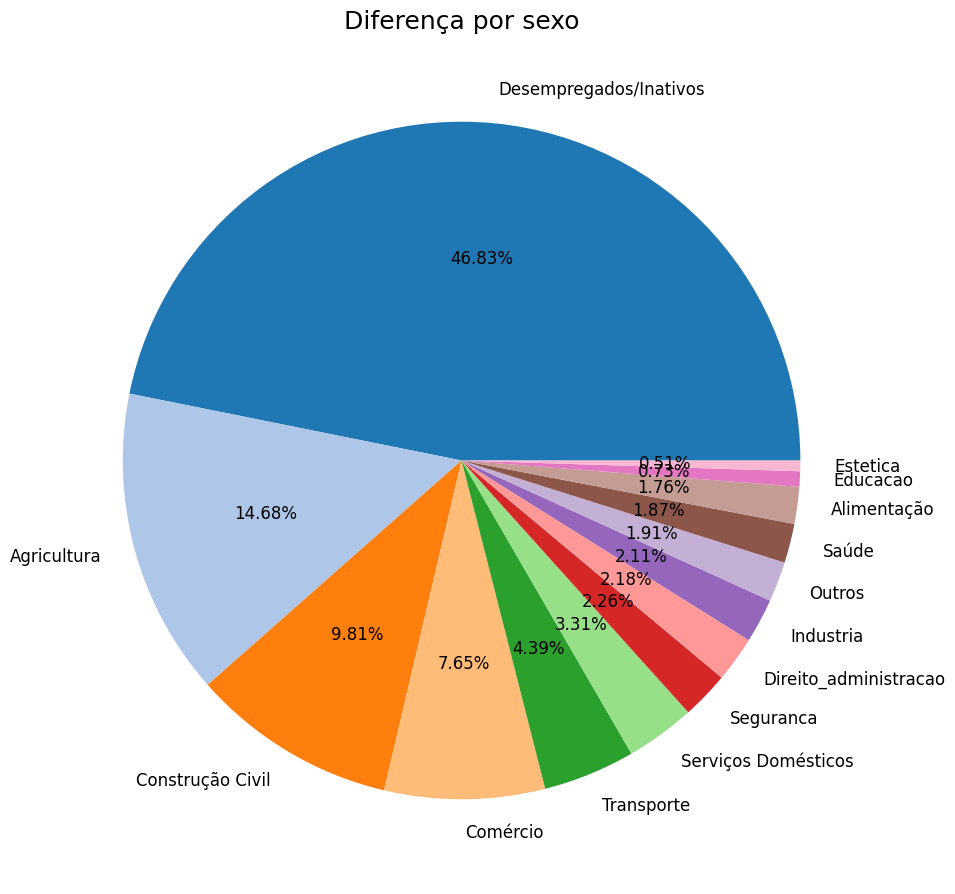

In [255]:

tab20_colors = plt.cm.tab20(np.linspace(0, 1, 20))  
accent_colors = plt.cm.magma(np.linspace(0, 1, 8))  
combined_colors = np.vstack((tab20_colors, accent_colors)) 

category_counts = bd3['CATEGORIA_OCUP'].value_counts()

plt.figure(figsize=(11, 11))
category_counts.plot.pie(autopct='%0.2f%%', fontsize=12, colors=combined_colors)

plt.ylabel('')  
plt.title('Diferença por sexo', fontsize=18)

plt.show()


<Figure size 2000x1000 with 0 Axes>

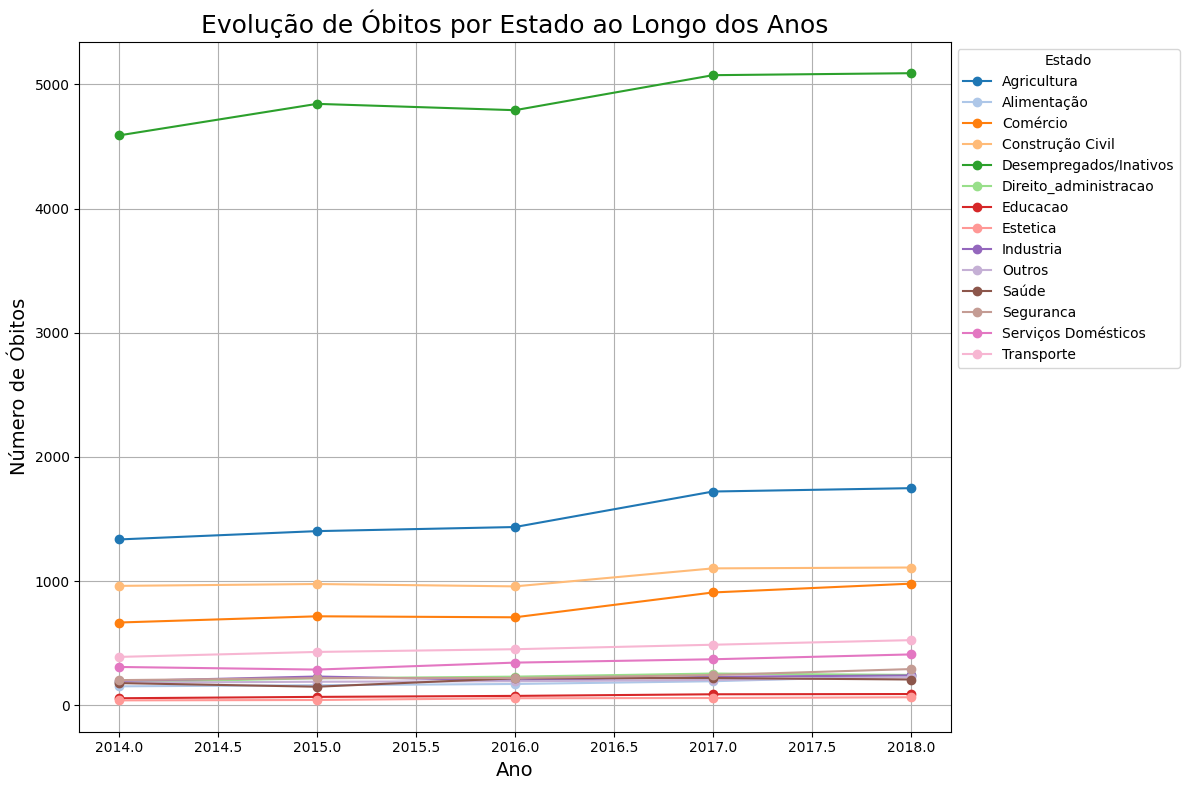

In [260]:
CATEGORIA_OCUP_ano = bd3.groupby(['CATEGORIA_OCUP', 'ANO']).size().unstack()

tab20_colors = plt.cm.tab20(np.linspace(0, 1, 20))  
accent_colors = plt.cm.magma(np.linspace(0, 1, 8)) 
combined_colors = np.vstack((tab20_colors, accent_colors))

plt.figure(figsize=(20, 10))
CATEGORIA_OCUP_ano.T.plot(kind='line', figsize=(12, 8), marker='o', color=combined_colors)

plt.title('Evolução de Óbitos por Estado ao Longo dos Anos', fontsize=18)
plt.ylabel('Número de Óbitos', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.legend(title='Estado', bbox_to_anchor=(1,1))
plt.grid(linestyle='-')
plt.tight_layout()
plt.show()

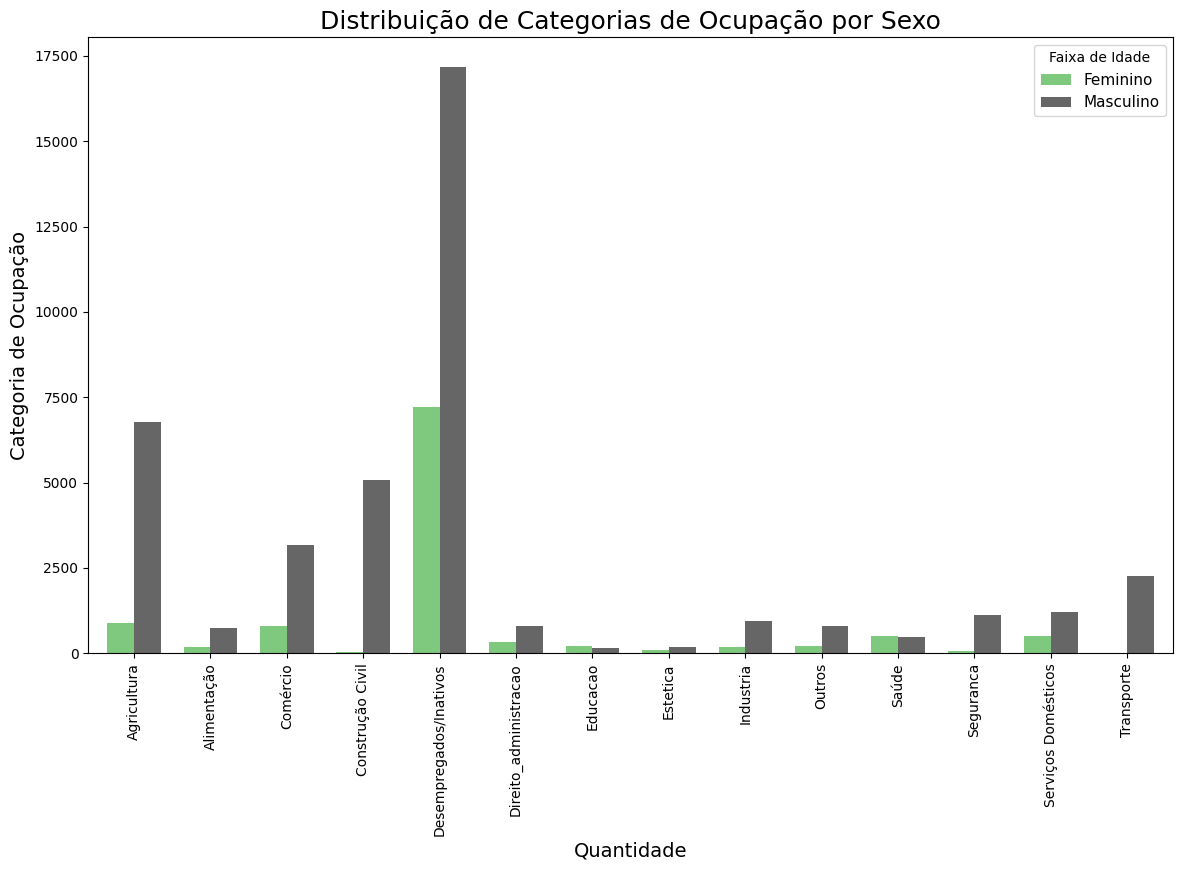

In [ ]:
categoria_sexo = pd.crosstab(bd3['CATEGORIA_OCUP'], bd3['SEXO'])

categoria_sexo.plot(kind='bar', figsize=(14, 8), cmap='Accent', width=0.7)
plt.title("Distribuição de Categorias de Ocupação por Sexo",fontsize=18)
plt.ylabel("Categoria de Ocupação" , fontsize=14)
plt.xlabel("Quantidade", fontsize=14)
plt.legend(title='Faixa de Idade', fontsize=11)

plt.show()

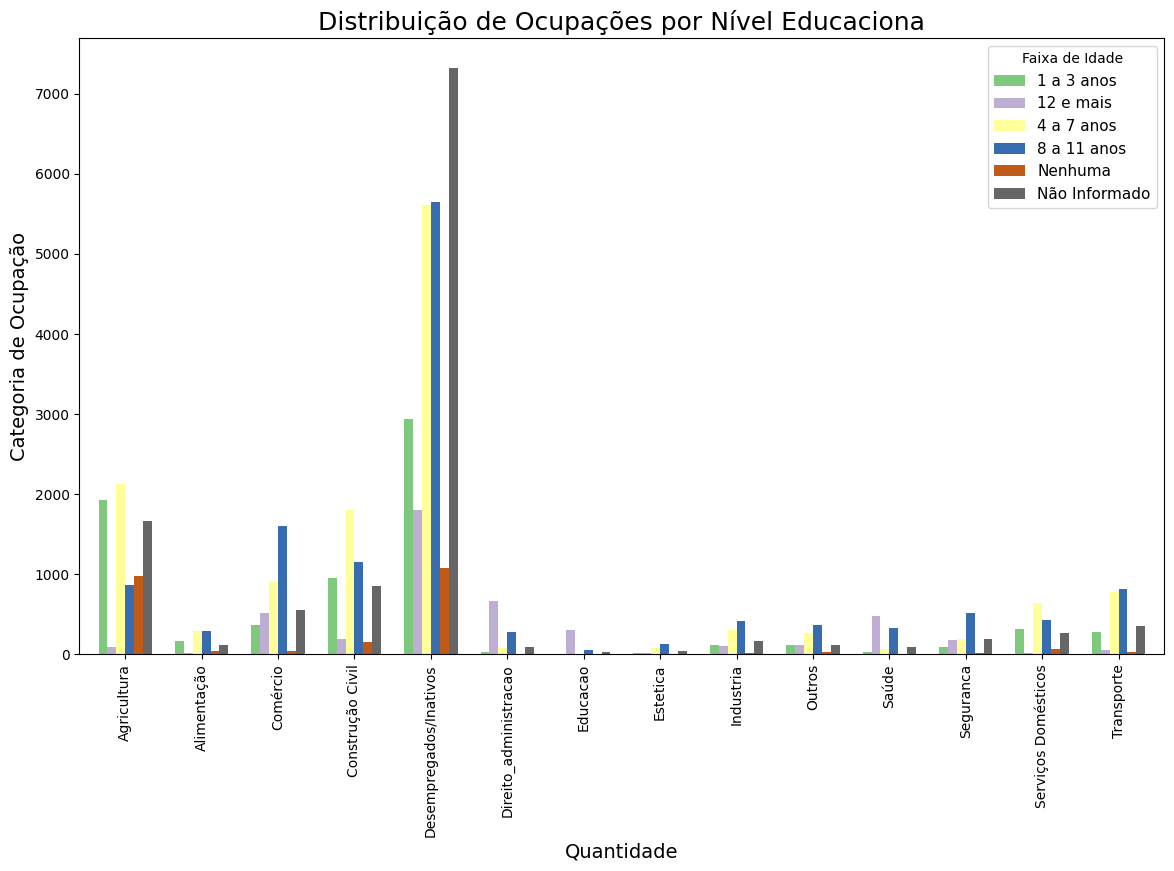

In [267]:
categoria_sexo = pd.crosstab(bd3['CATEGORIA_OCUP'], bd3['ESC'])

categoria_sexo.plot(kind='bar', figsize=(14, 8), cmap='Accent', width=0.7)
plt.title("Distribuição de Ocupações por Nível Educaciona",fontsize=18)
plt.ylabel("Categoria de Ocupação" , fontsize=14)
plt.xlabel("Quantidade", fontsize=14)
plt.legend(title='Faixa de Idade', fontsize=11)

plt.show()


In [269]:
categoria_counts = bd3['CATEGORIA_OCUP'].value_counts()

categoria_counts

CATEGORIA_OCUP
Desempregados/Inativos    24393
Agricultura                7646
Construção Civil           5110
Comércio                   3982
Transporte                 2285
Serviços Domésticos        1722
Seguranca                  1178
Direito_administracao      1134
Industria                  1099
Outros                      996
Saúde                       975
Alimentação                 918
Educacao                    381
Estetica                    264
Name: count, dtype: int64